In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
# Importation des bibliothèques nécessaires

# Traitement des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modèles statistiques
import statsmodels.api as sm


# Deep learning
import tensorflow as tf

# Outils utiles
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score







In [ ]:
# Charger les données
df = pd.read_csv("dataset.csv")


# Aperçu général
print("Aperçu du dataset :")
print(df.head())

print("\nInformations sur les colonnes :")
print(df.info())

print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


# Affichage de nombre de doublons

nb_doublons = df.duplicated().sum()
print(f"Nombre de doublons dans le dataset : {nb_doublons}")

# Conversion des dates
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

# Statistiques descriptives de la variable 'value'
df['value'] = pd.to_numeric(df['value'], errors='coerce')
print("\nStatistiques descriptives de 'value' (CO₂) :")
print(df['value'].describe())



Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Affichage du nombre de valeurs aberrantes
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
print(f"Nombre de valeurs aberrantes détectées : {len(outliers)}")

Aperçu du dataset :
     country        date sector      value   timestamp
0     Brazil  01/01/2019  Power   0.096799  1546300800
1      China  01/01/2019  Power  14.816100  1546300800
2  EU27 & UK  01/01/2019  Power   1.886490  1546300800
3     France  01/01/2019  Power   0.051217  1546300800
4    Germany  01/01/2019  Power   0.315002  1546300800

Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB
None

Valeurs manquantes par colonne :
country      0
date         0
sector       0
value        0
timestamp    0
dtype: int64
Nombre de doublons dans le data

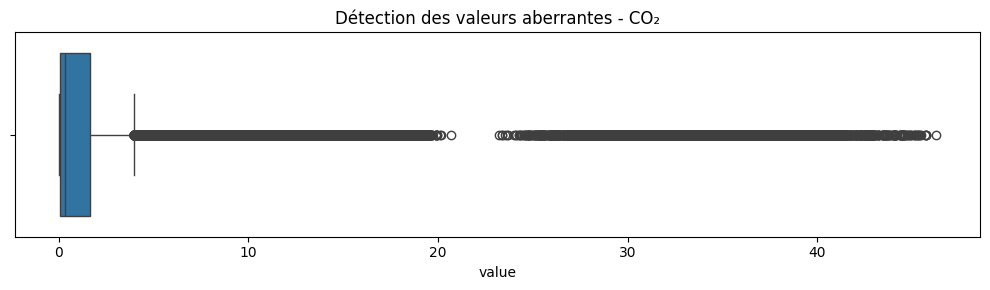

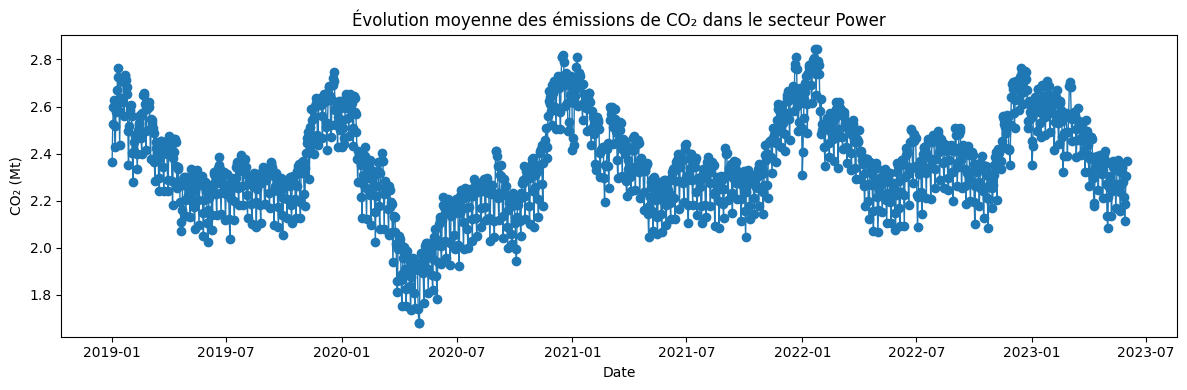

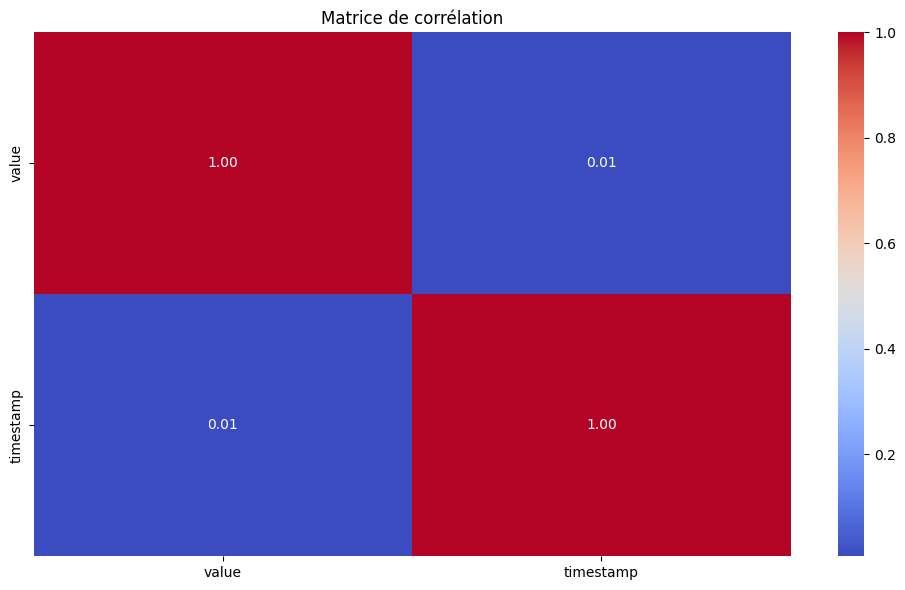

In [ ]:
# Distribution de CO₂
plt.figure(figsize=(10, 4))
sns.histplot(df['value'], kde=True, bins=40)
plt.title("Distribution des valeurs de CO₂ (Mt)")
plt.xlabel("Valeurs de CO₂")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

# Boxplot pour détecter les valeurs aberrantes
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['value'])
plt.title("Détection des valeurs aberrantes - CO₂")
plt.tight_layout()
plt.show()

#  Émissions moyennes par pays
plt.figure(figsize=(12, 5))
df.groupby('country')['value'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Émissions moyennes de CO₂ par pays")
plt.ylabel("Moyenne (value)")
plt.tight_layout()
plt.show()

# Évolution du CO₂ dans le temps (moyenne globale)
df_time = df.groupby('date')['value'].mean().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(df_time['date'], df_time['value'], marker='o', linewidth=1)
plt.title("Évolution moyenne des émissions de CO₂ dans le secteur Power")
plt.xlabel("Date")
plt.ylabel("CO₂ (Mt)")
plt.tight_layout()
plt.show()

# Corrélation entre les colonnes numériques
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()



In [ ]:

from sklearn.preprocessing import MinMaxScaler
# Encodage des colonnes catégorielles
# Encodage de 'sector' seulement
df = pd.get_dummies(df, columns=['sector'], drop_first=True)


# Tri par date
df.sort_values('date', inplace=True)

# Normalisation de la variable 'value'

scaler = MinMaxScaler()
df['value_scaled'] = scaler.fit_transform(df[['value']])

# Remplacer les outliers par la médiane
df.loc[(df['value'] < lower_bound) | (df['value'] > upper_bound), 'value'] = df['value'].median()

# Extraire des caractéristiques temporelles utiles
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter



df.to_csv("dataset_preprocessed.csv", index=False)
print("Dataset prétraité sauvegardé sous 'dataset_preprocessed.csv'")



Dataset prétraité sauvegardé sous 'dataset_preprocessed.csv'


In [ ]:

# Liste des pays
pays_list = ['Brazil', 'China', 'EU27 & UK', 'France', 'Germany', 'India',
             'Italy', 'Japan', 'ROW', 'Russia', 'Spain', 'UK', 'US', 'WORLD']

# Boucle sur les pays
for pays in pays_list:
    print(f"\n=== Traitement pour le pays : {pays} ===")

    # Sélectionner les données du pays
    df_pays = df[df['country'] == pays].copy()

    if df_pays.empty:
        print(f"Aucune donnée pour {pays}, passage au suivant.")
        continue

    # Agrégation par mois pour le pays
    df_pays_monthly = df_pays.resample('ME', on='date')['value'].mean().reset_index()

    # Afficher un aperçu
    print(df_pays_monthly.head())





=== Traitement pour le pays : Brazil ===
        date     value
0 2019-01-31  0.173907
1 2019-02-28  0.204370
2 2019-03-31  0.186313
3 2019-04-30  0.187789
4 2019-05-31  0.187146

=== Traitement pour le pays : China ===
        date     value
0 2019-01-31  1.105169
1 2019-02-28  1.087840
2 2019-03-31  0.979707
3 2019-04-30  0.874500
4 2019-05-31  0.809103

=== Traitement pour le pays : EU27 & UK ===
        date     value
0 2019-01-31  1.699234
1 2019-02-28  1.723429
2 2019-03-31  1.544430
3 2019-04-30  1.471266
4 2019-05-31  1.393243

=== Traitement pour le pays : France ===
        date     value
0 2019-01-31  0.174784
1 2019-02-28  0.166988
2 2019-03-31  0.148705
3 2019-04-30  0.141467
4 2019-05-31  0.130376

=== Traitement pour le pays : Germany ===
        date     value
0 2019-01-31  0.401270
1 2019-02-28  0.383177
2 2019-03-31  0.321356
3 2019-04-30  0.312118
4 2019-05-31  0.298428

=== Traitement pour le pays : India ===
        date     value
0 2019-01-31  1.293703
1 2019-02-

In [1]:
from sklearn.model_selection import TimeSeriesSplit
 # Découpage pour validation croisée sur tout df_monthly
tscv = TimeSeriesSplit(n_splits=5)

print("\nValidation croisée (TimeSeriesSplit) sur l'ensemble des données :")
for fold, (train_idx, val_idx) in enumerate(tscv.split(df_monthly)):
    train_fold = df_monthly.iloc[train_idx]
    val_fold = df_monthly.iloc[val_idx]

IndentationError: unexpected indent (<ipython-input-1-2d4df5431763>, line 2)


=== Traitement pour le pays : Brazil ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


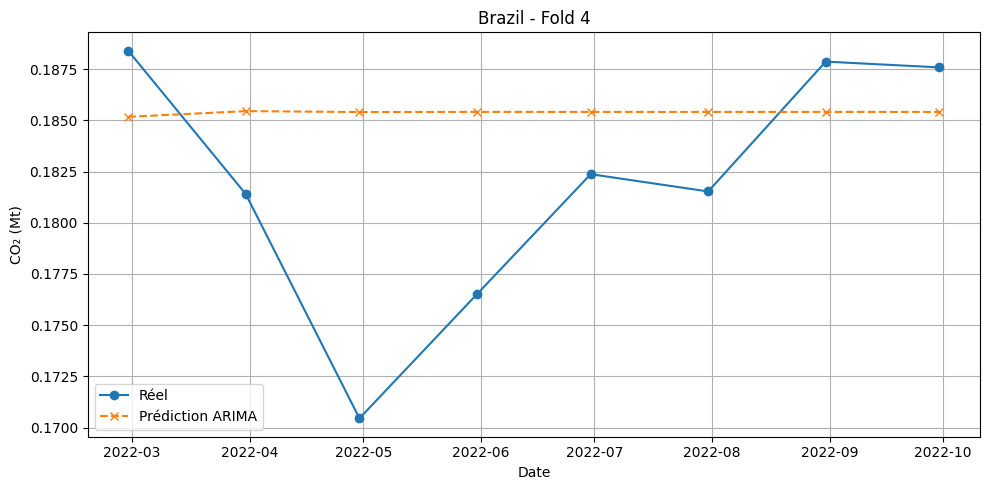

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


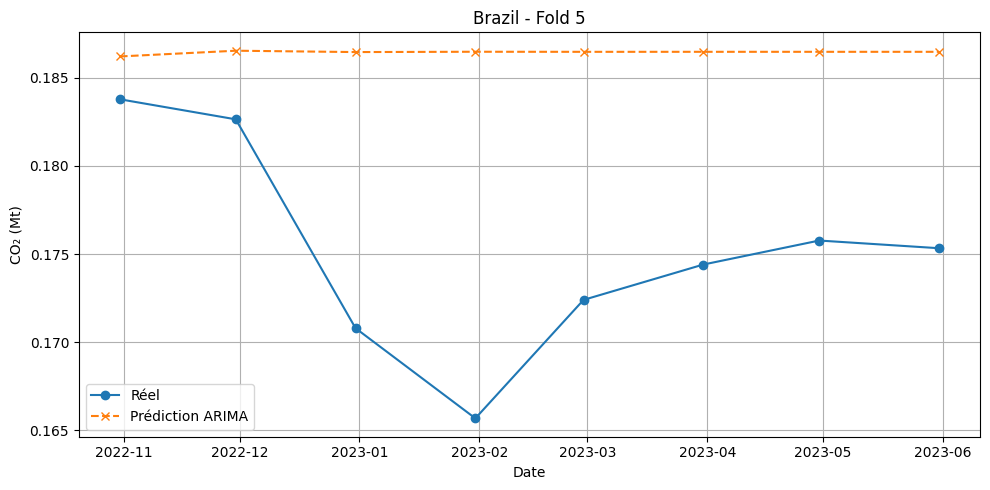


📈 Résultats pour Brazil :
     Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0  Brazil     1  0.002229  0.047214  0.042677 -4.515936        0.160079   
1  Brazil     2  0.000624  0.024987  0.023197 -6.228476        0.075736   
2  Brazil     3  0.000879  0.029651  0.027151 -2.538384        0.940737   
3  Brazil     4  0.000046  0.006749  0.005333 -0.346922        0.139198   
4  Brazil     5  0.000160  0.012650  0.011341 -4.171127        0.815363   

   Pred Time (s)  Nb Parameters  
0       0.002552              3  
1       0.003098              3  
2       0.002803              3  
3       0.003501              3  
4       0.005389              3  

=== Traitement pour le pays : China ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


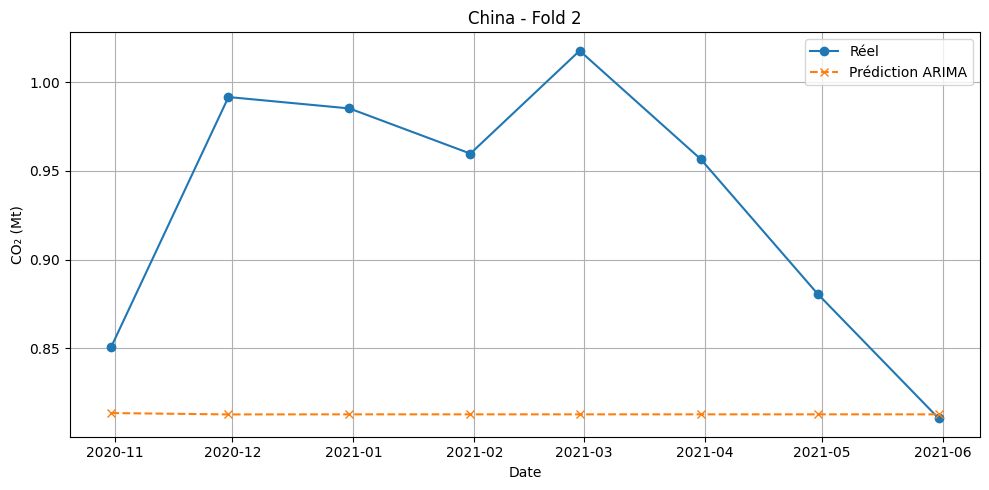

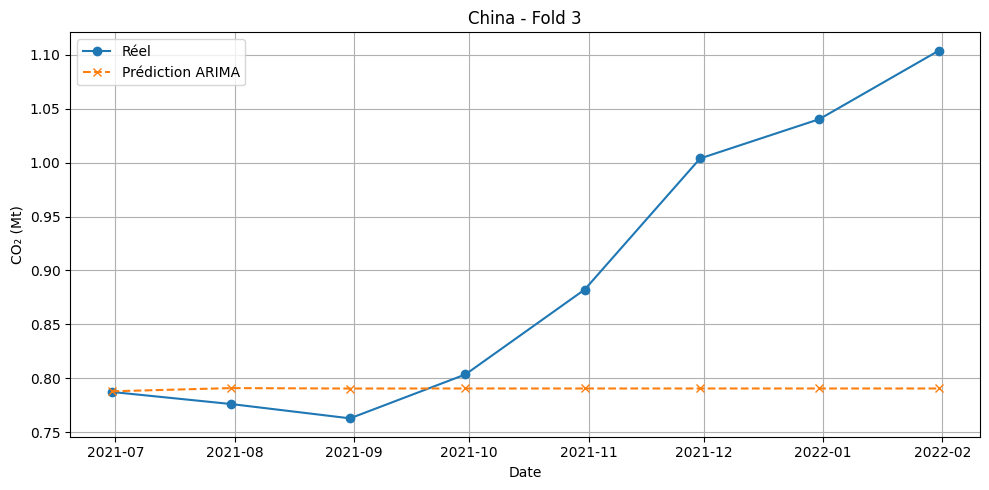

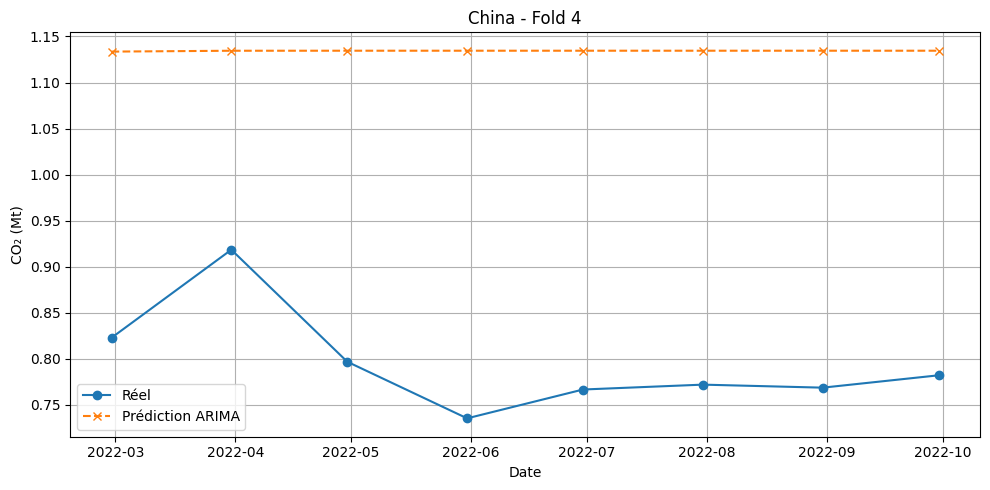


📈 Résultats pour China :
    Pays  Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0  China     1  0.029566  0.171948  0.170219 -25.316119        0.084462   
1  China     2  0.019024  0.137928  0.119395  -2.892131        0.065094   
2  China     3  0.026975  0.164242  0.115567  -0.680805        0.073067   
3  China     4  0.117826  0.343259  0.339256 -42.250252        0.083733   
4  China     5  0.028832  0.169799  0.142116  -2.334546        0.086774   

   Pred Time (s)  Nb Parameters  
0       0.002983              3  
1       0.003089              3  
2       0.002933              3  
3       0.003008              3  
4       0.002574              3  

=== Traitement pour le pays : EU27 & UK ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


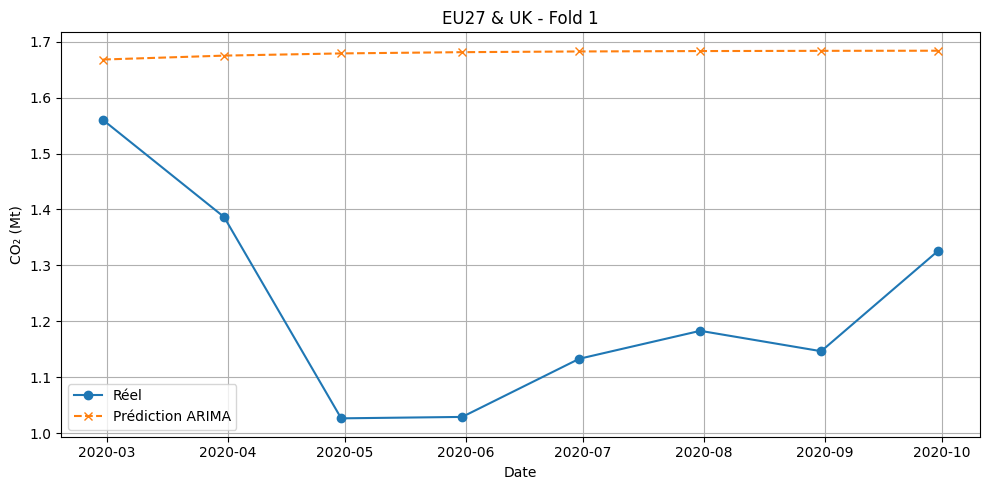

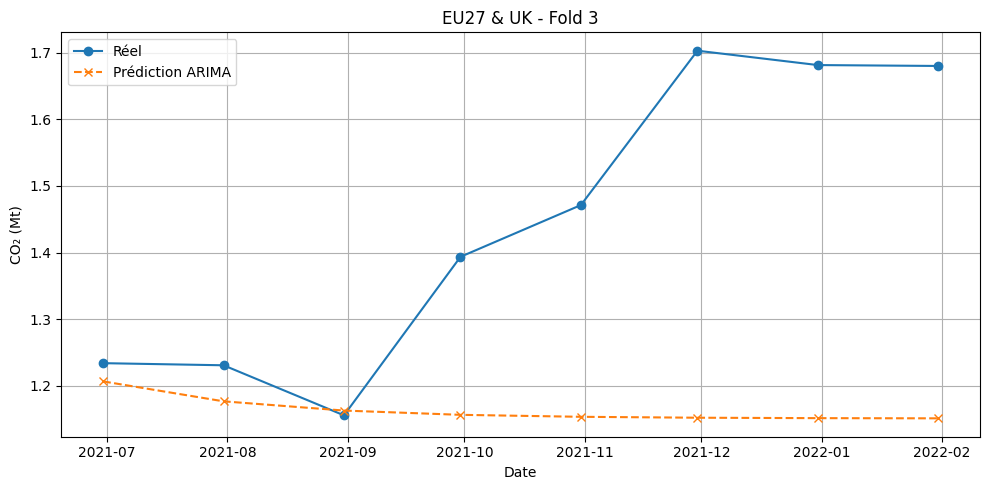

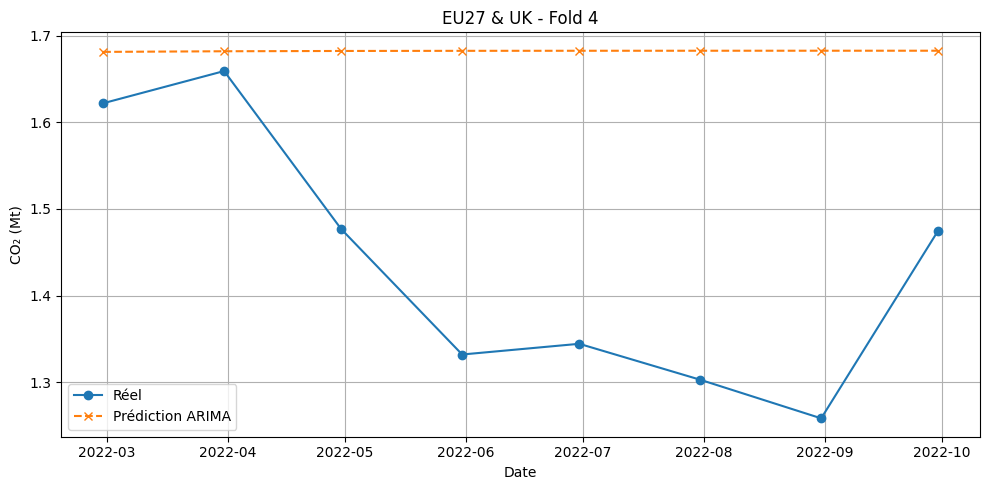

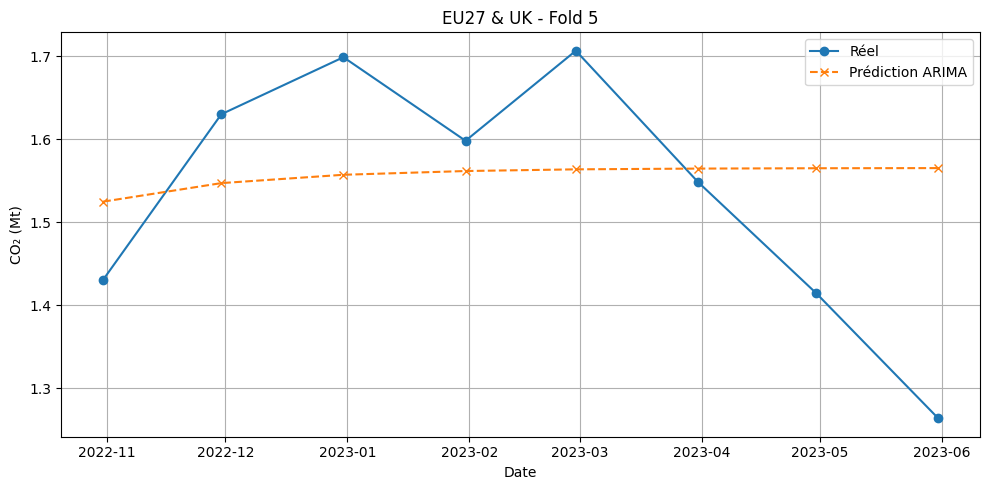


📈 Résultats pour EU27 & UK :
        Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0  EU27 & UK     1  0.239355  0.489239  0.455775 -6.893673        0.062288   
1  EU27 & UK     2  0.027633  0.166232  0.148418 -0.958016        0.042119   
2  EU27 & UK     3  0.128081  0.357884  0.281620 -1.886338        0.079078   
3  EU27 & UK     4  0.081514  0.285507  0.248739 -3.170354        0.052589   
4  EU27 & UK     5  0.021400  0.146287  0.120716 -0.017180        0.109281   

   Pred Time (s)  Nb Parameters  
0       0.003052              3  
1       0.003824              3  
2       0.003107              3  
3       0.003216              3  
4       0.003239              3  

=== Traitement pour le pays : France ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


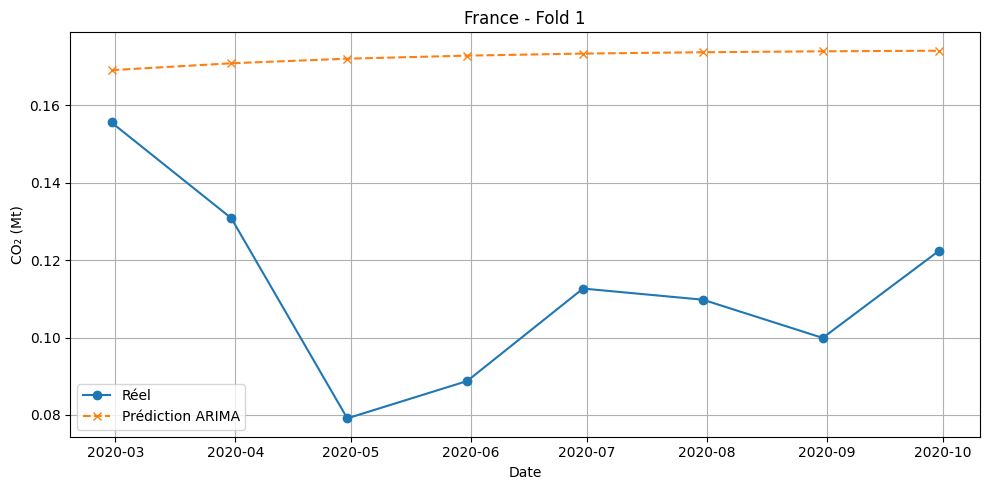

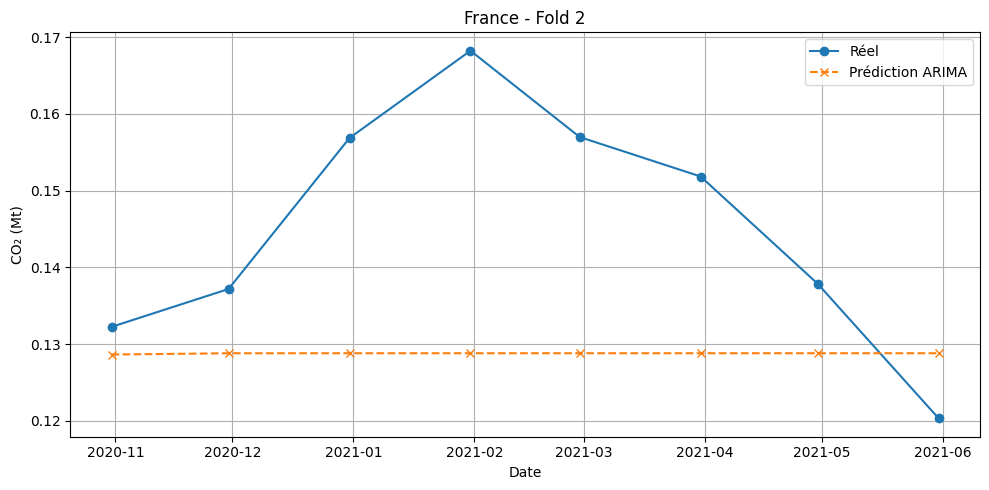

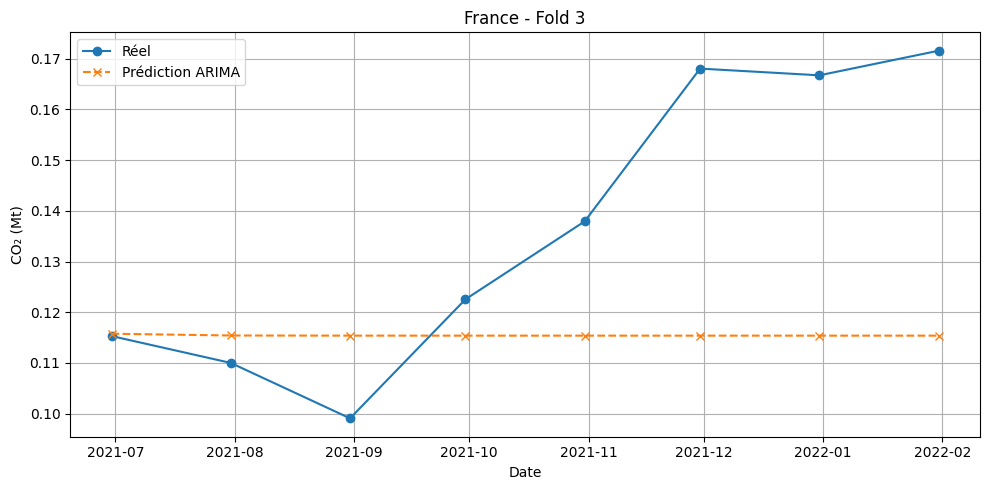

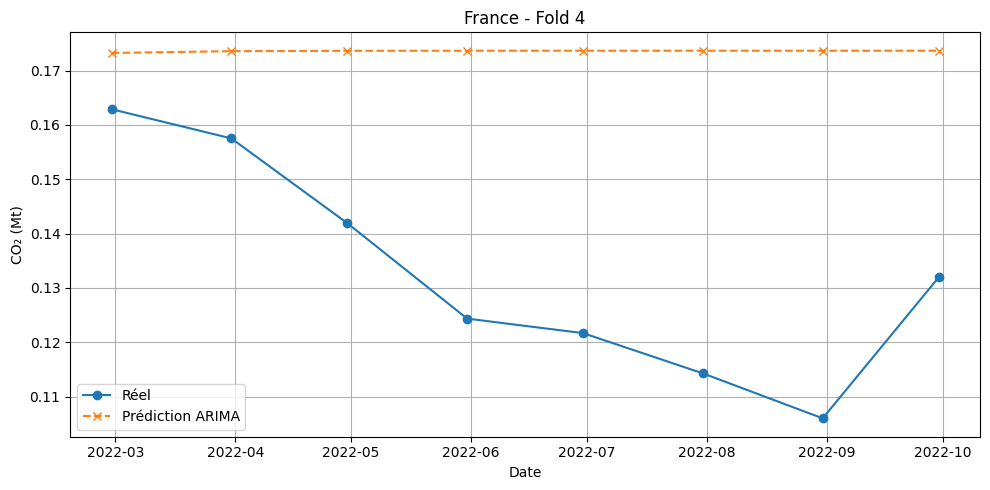

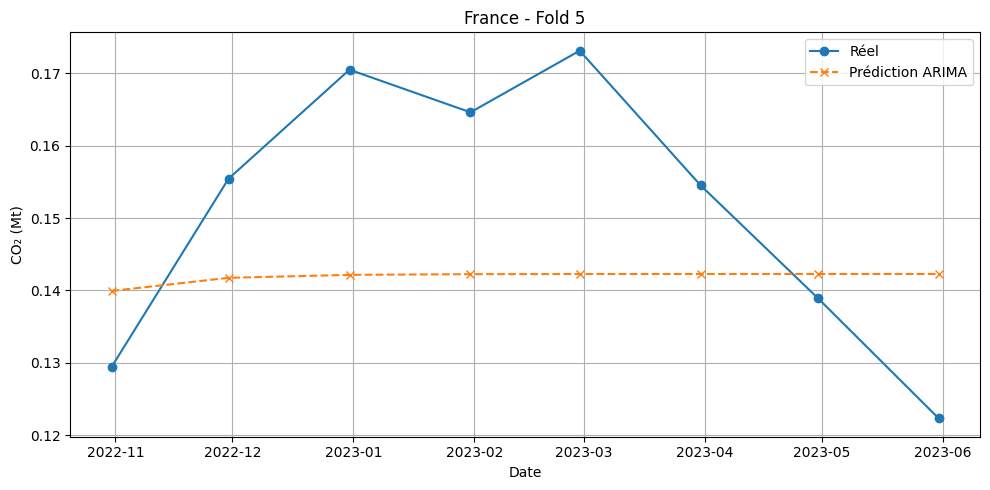


📈 Résultats pour France :
     Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0  France     1  0.004183  0.064677  0.060161 -7.090726        0.122763   
1  France     2  0.000488  0.022085  0.018524 -1.224734        0.066479   
2  France     3  0.001179  0.034333  0.026521 -0.600370        0.072731   
3  France     4  0.002041  0.045181  0.040999 -4.722913        0.057138   
4  France     5  0.000389  0.019730  0.017664 -0.235093        0.039989   

   Pred Time (s)  Nb Parameters  
0       0.002872              3  
1       0.002664              3  
2       0.003079              3  
3       0.003134              3  
4       0.003429              3  

=== Traitement pour le pays : Germany ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


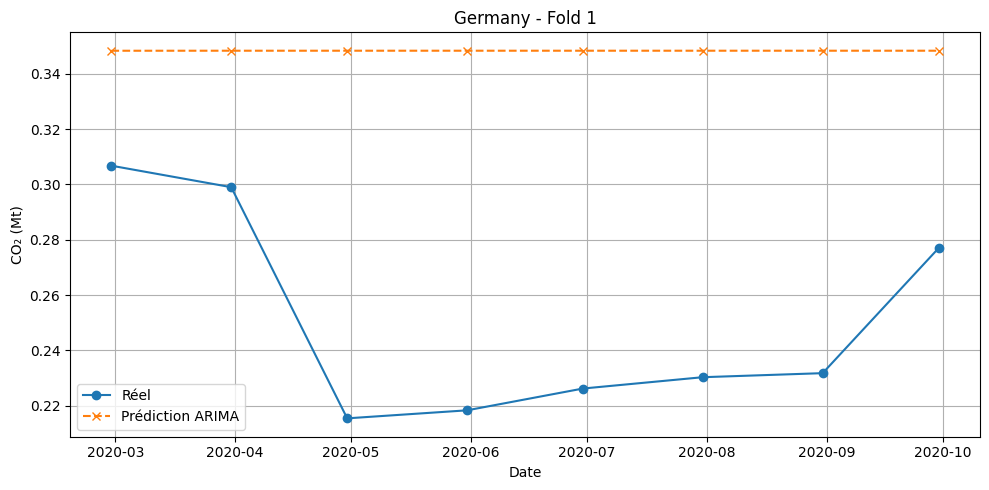

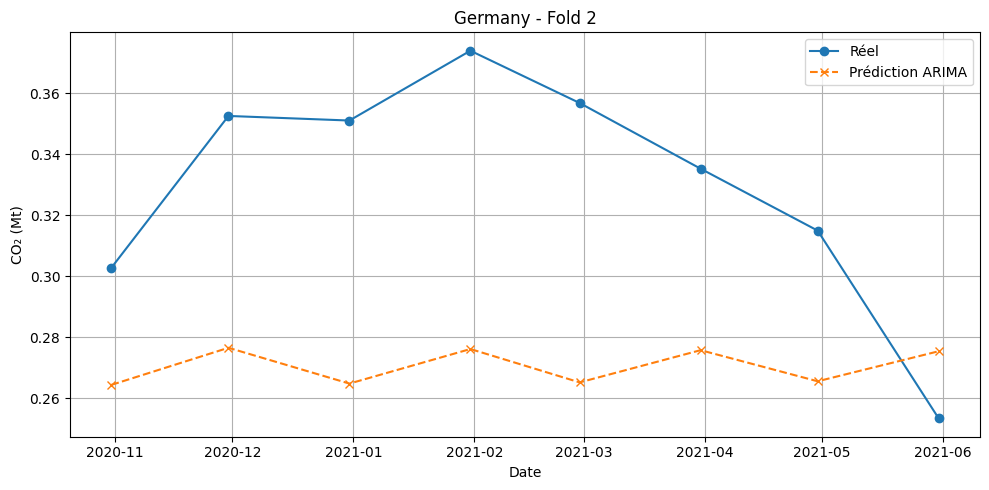

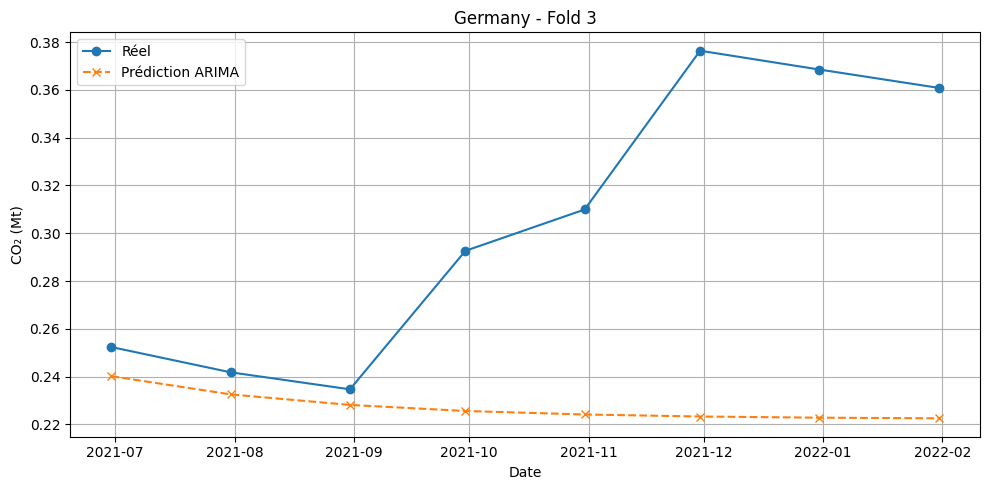

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


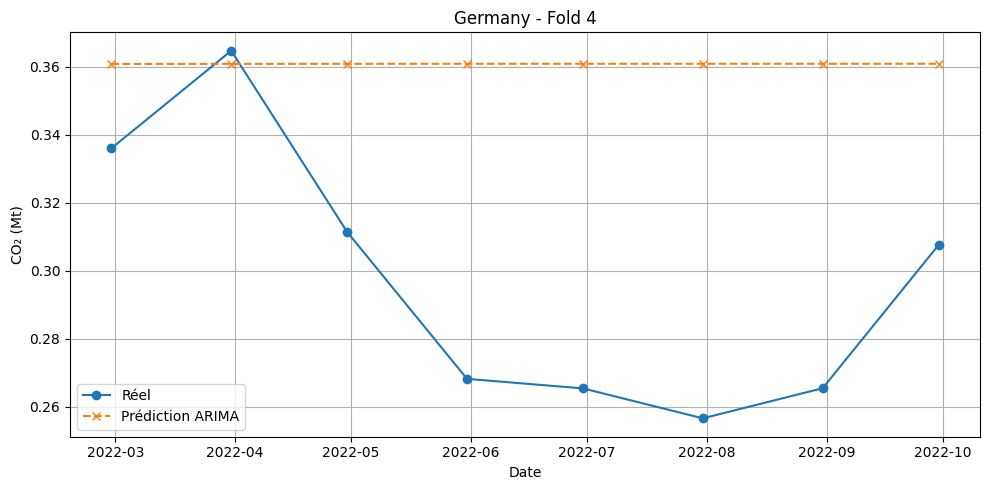

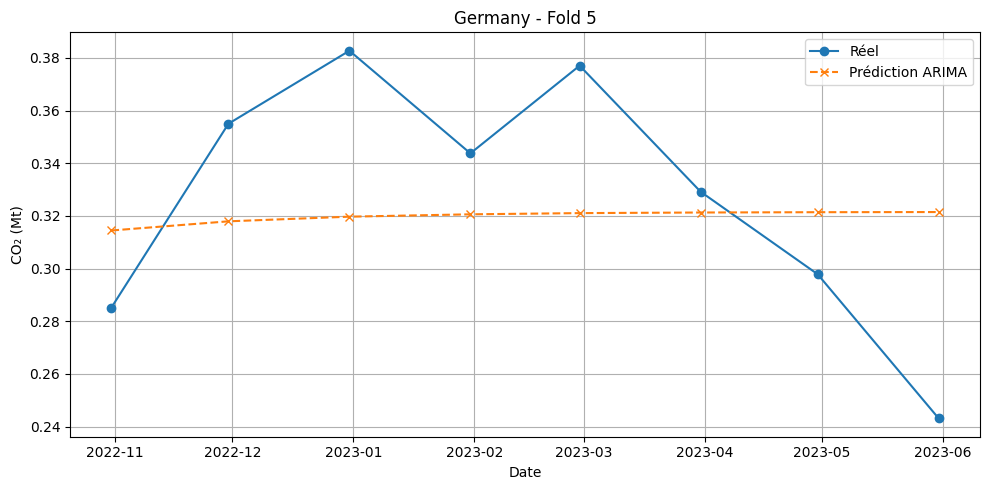


📈 Résultats pour Germany :
      Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0  Germany     1  0.010787  0.103860  0.097760 -7.772576        0.043957   
1  Germany     2  0.004884  0.069883  0.065085 -2.739012        0.097050   
2  Germany     3  0.009485  0.097393  0.077215 -2.145826        0.117217   
3  Germany     4  0.005461  0.073896  0.064973 -3.006039        0.114378   
4  Germany     5  0.002079  0.045591  0.039788 -0.019301        0.092596   

   Pred Time (s)  Nb Parameters  
0       0.002668              3  
1       0.003153              3  
2       0.003533              3  
3       0.003764              3  
4       0.003475              3  

=== Traitement pour le pays : India ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


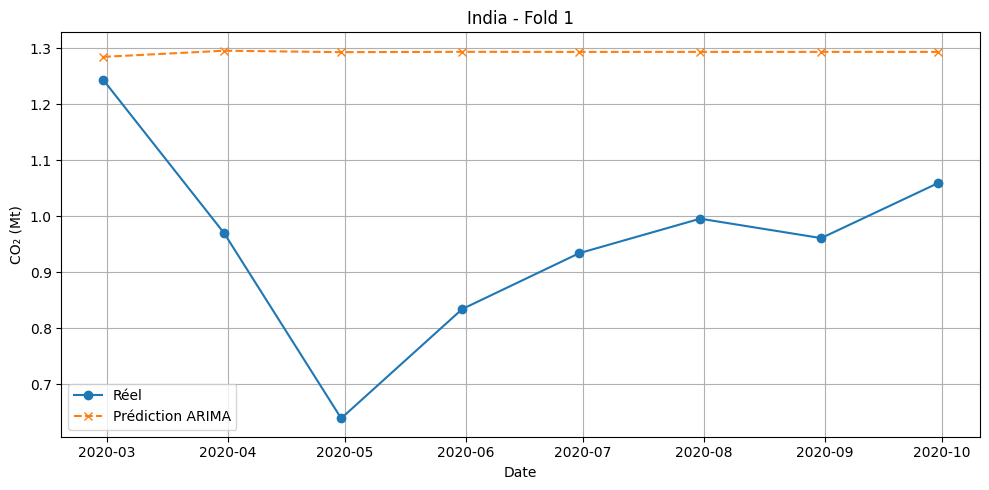

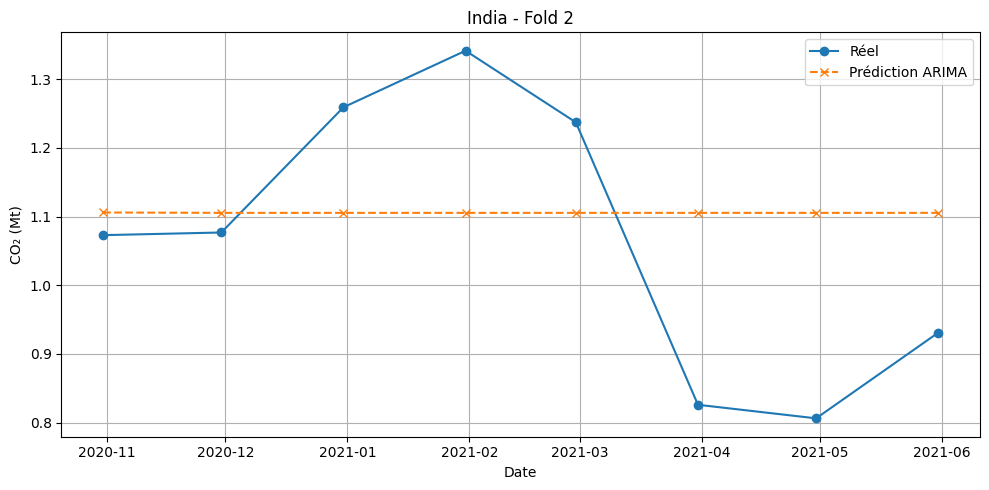

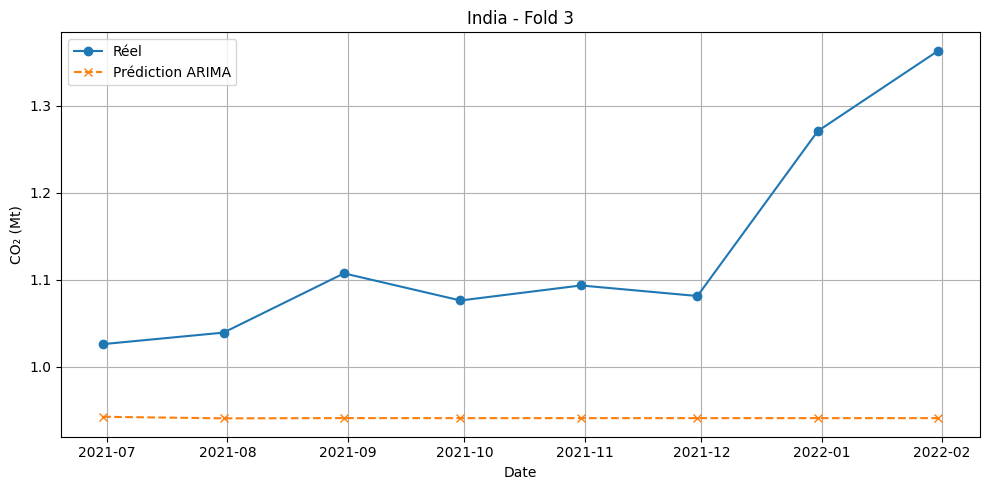

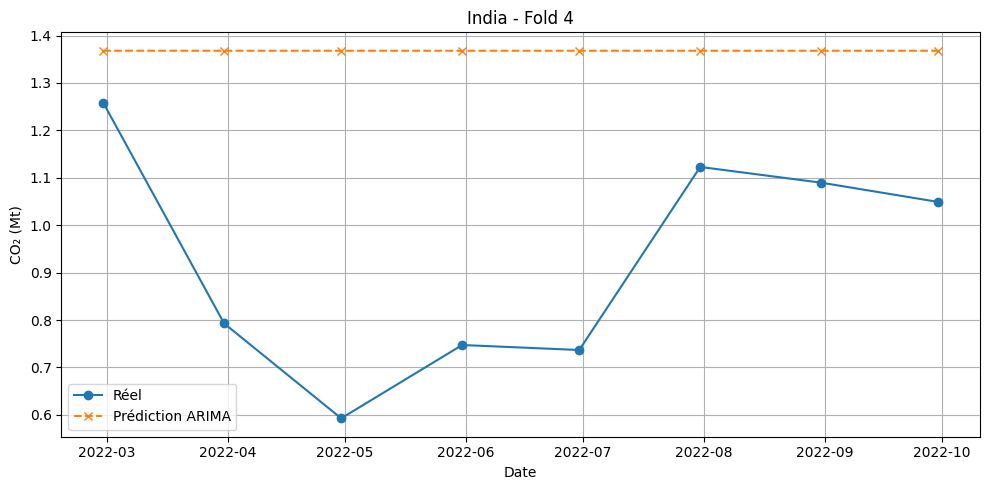

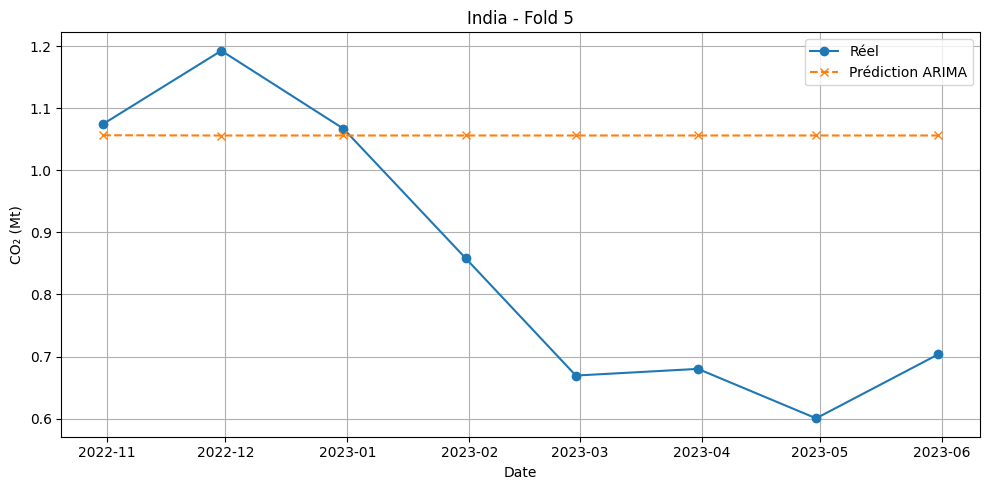


📈 Résultats pour India :
    Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0  India     1  0.141175  0.375732  0.337941 -4.355198        0.085161   
1  India     2  0.037077  0.192553  0.167014 -0.037520        0.089707   
2  India     3  0.048997  0.221353  0.190893 -2.913189        0.064139   
3  India     4  0.245780  0.495763  0.444188 -4.069282        0.060735   
4  India     5  0.084999  0.291546  0.241604 -0.891471        0.049890   

   Pred Time (s)  Nb Parameters  
0       0.003486              3  
1       0.002579              3  
2       0.002594              3  
3       0.003082              3  
4       0.006522              3  

=== Traitement pour le pays : Italy ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


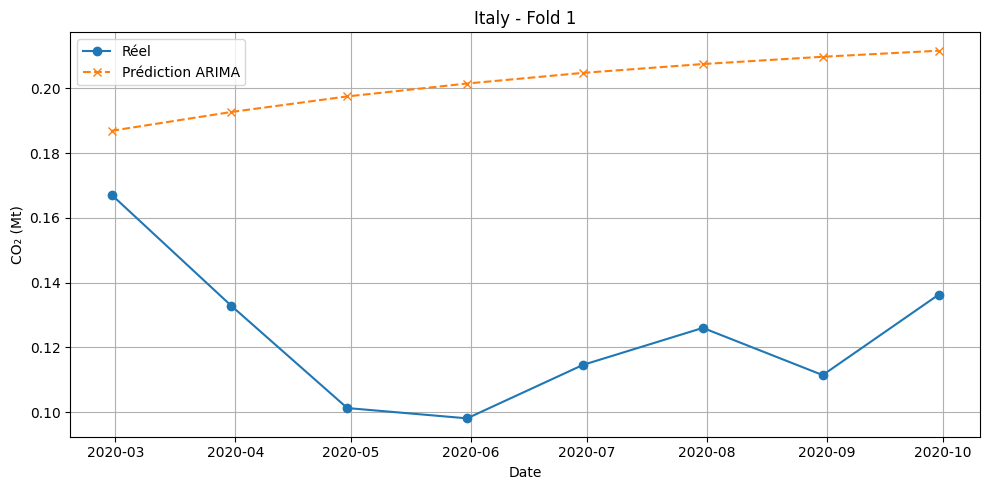


📈 Résultats pour Italy :
    Pays  Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0  Italy     1  0.006760  0.082221  0.078098 -14.317903        0.314380   
1  Italy     2  0.000279  0.016698  0.014442  -0.271670        0.243519   
2  Italy     3  0.002103  0.045863  0.038213  -2.172097        0.590718   
3  Italy     4  0.001355  0.036814  0.031718  -2.007940        0.090955   
4  Italy     5  0.000428  0.020680  0.018614  -0.200676        0.118556   

   Pred Time (s)  Nb Parameters  
0       0.002617              3  
1       0.006156              3  
2       0.005266              3  
3       0.002959              3  
4       0.003688              3  

=== Traitement pour le pays : Japan ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


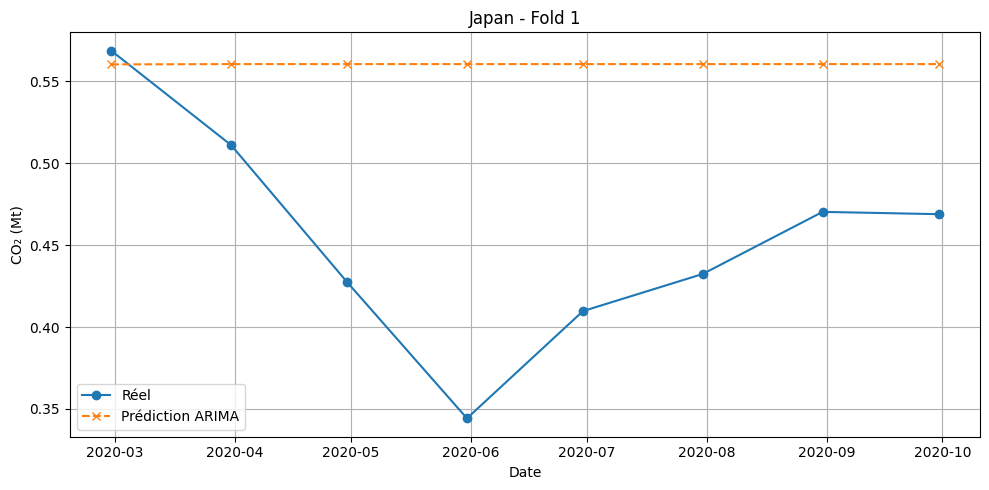

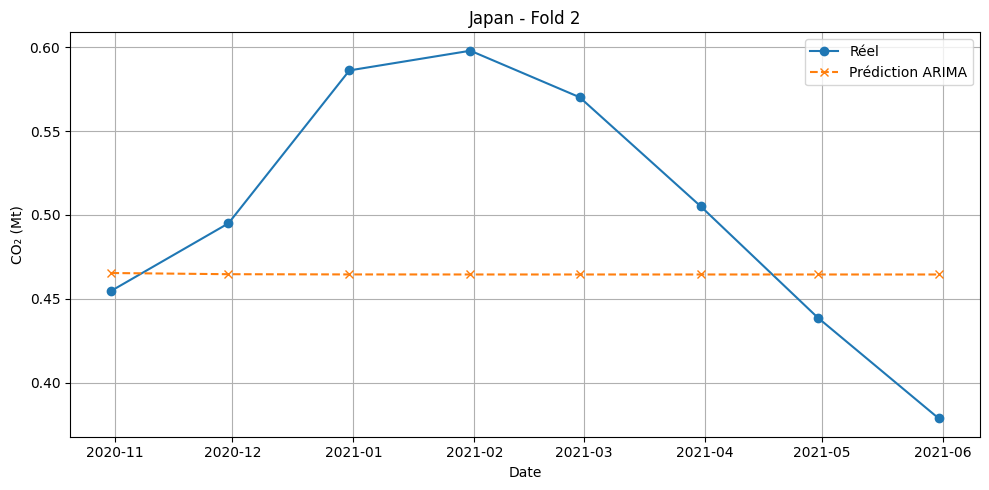

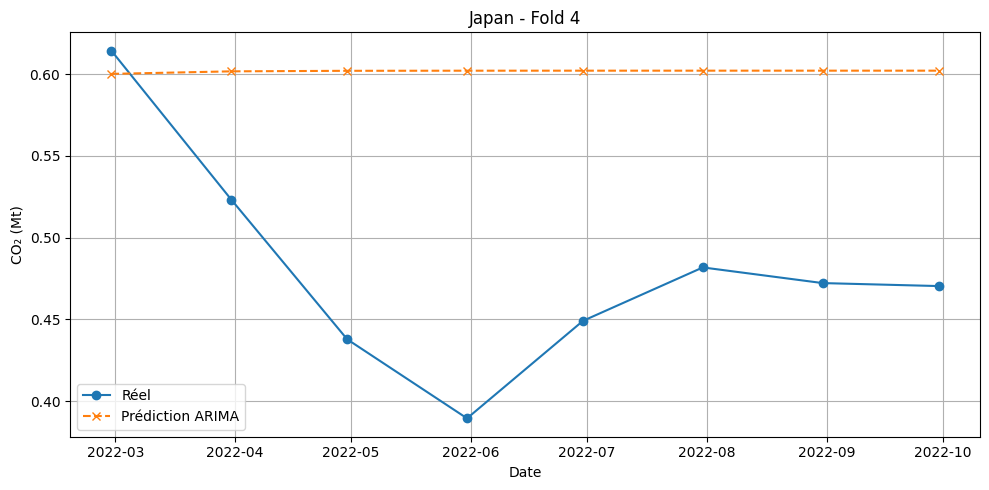


📈 Résultats pour Japan :
    Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0  Japan     1  0.015341  0.123859  0.108511 -2.825359        0.068777   
1  Japan     2  0.006810  0.082525  0.069232 -0.284790        0.065530   
2  Japan     3  0.022041  0.148462  0.135062 -5.065579        0.122547   
3  Japan     4  0.018846  0.137280  0.125601 -3.859523        0.087181   
4  Japan     5  0.004906  0.070045  0.059663 -0.069396        0.088999   

   Pred Time (s)  Nb Parameters  
0       0.002641              3  
1       0.003741              3  
2       0.003181              3  
3       0.004926              3  
4       0.003338              3  

=== Traitement pour le pays : ROW ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


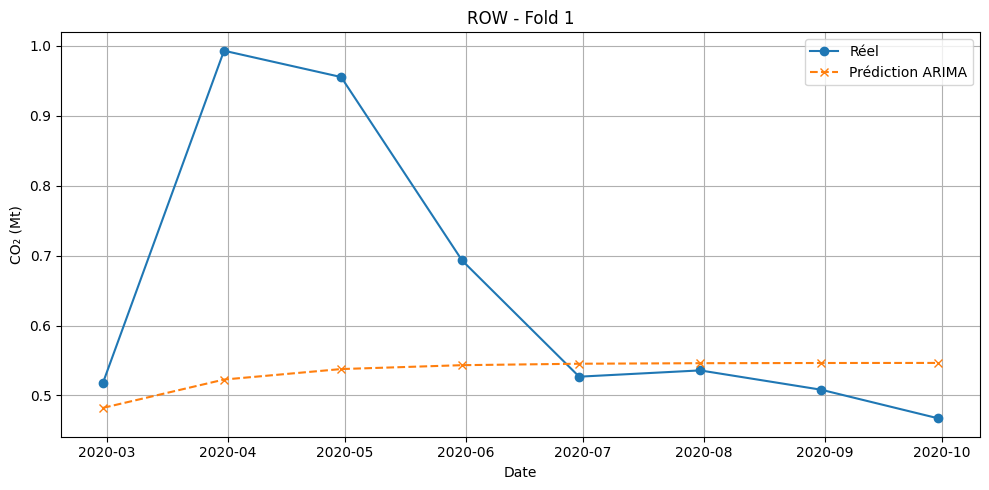

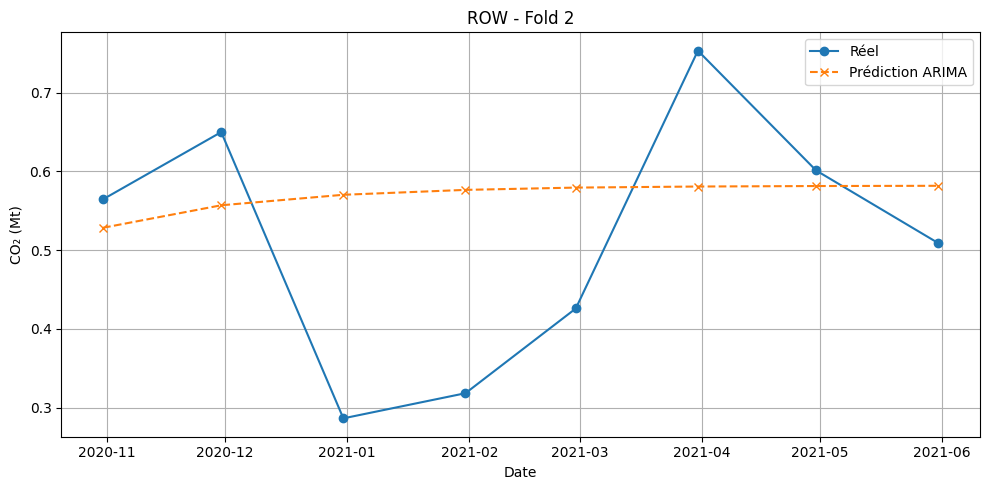

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


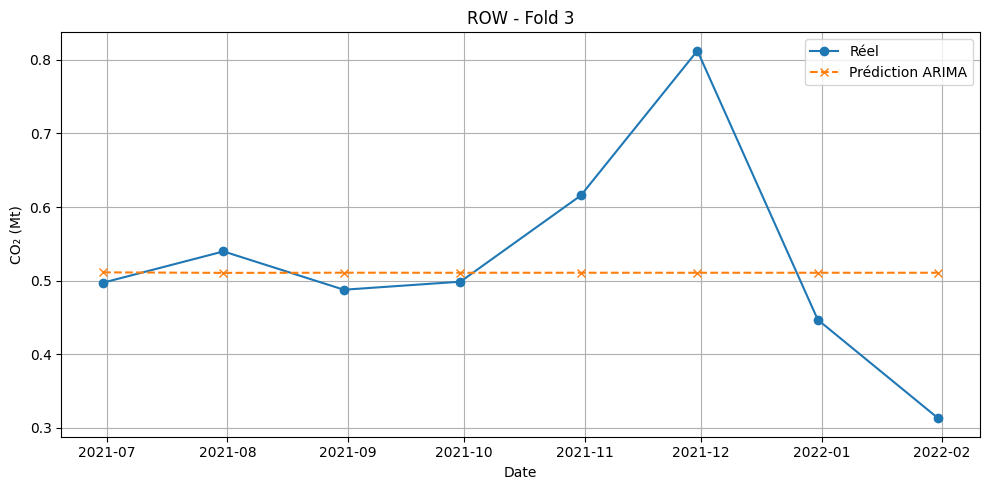

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


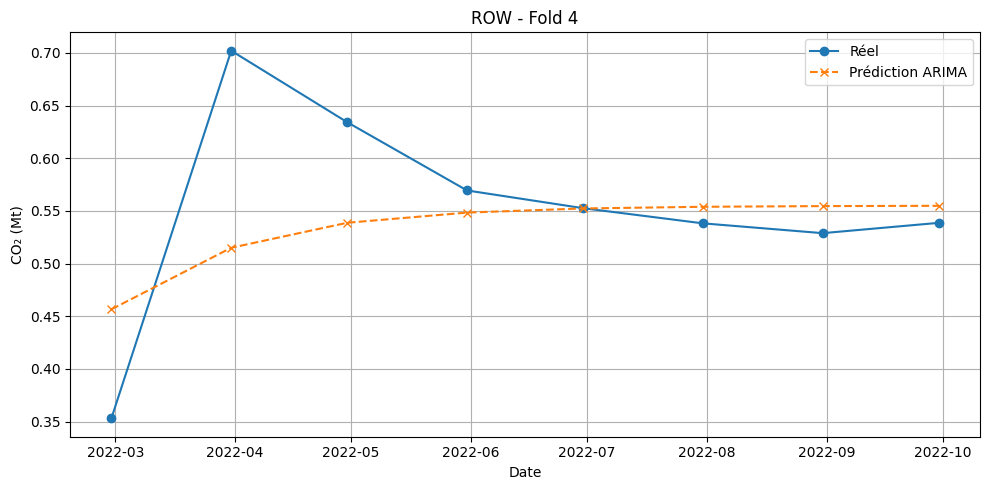

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


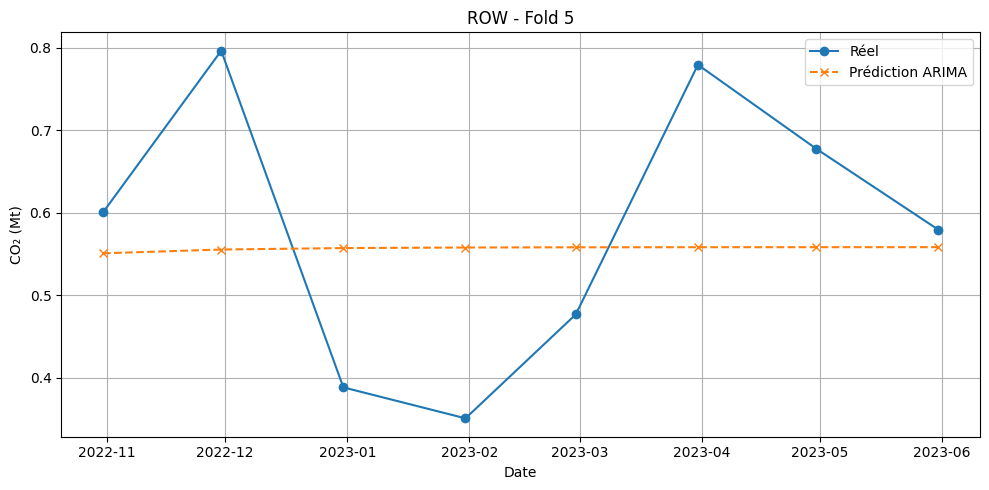


📈 Résultats pour ROW :
  Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0  ROW     1  0.053484  0.231267  0.152573 -0.371001        0.097565   
1  ROW     2  0.027050  0.164470  0.136274 -0.176689        0.135134   
2  ROW     3  0.018367  0.135524  0.093343 -0.013708        0.106118   
3  ROW     4  0.007055  0.083995  0.058118  0.194433        0.125177   
4  ROW     5  0.025248  0.158895  0.138654 -0.029069        0.080069   

   Pred Time (s)  Nb Parameters  
0       0.003234              3  
1       0.006849              3  
2       0.002726              3  
3       0.004177              3  
4       0.003042              3  

=== Traitement pour le pays : Russia ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


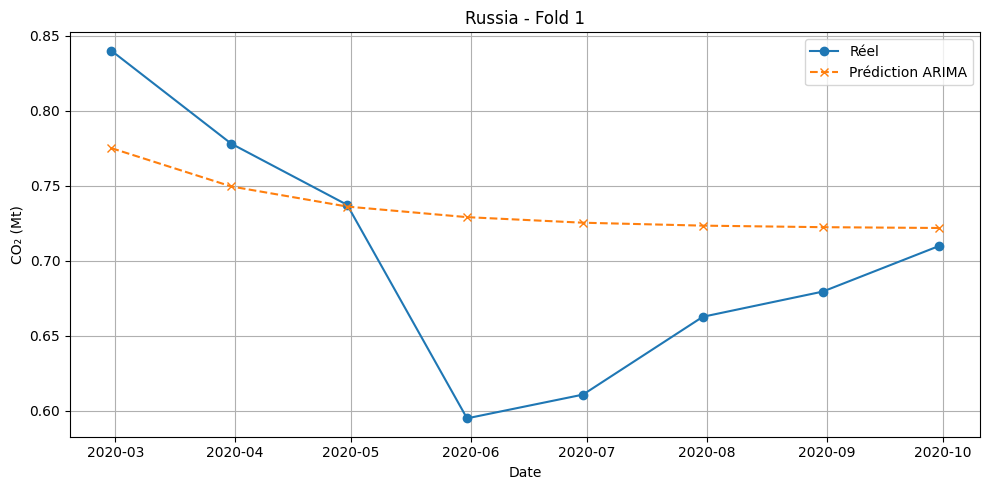

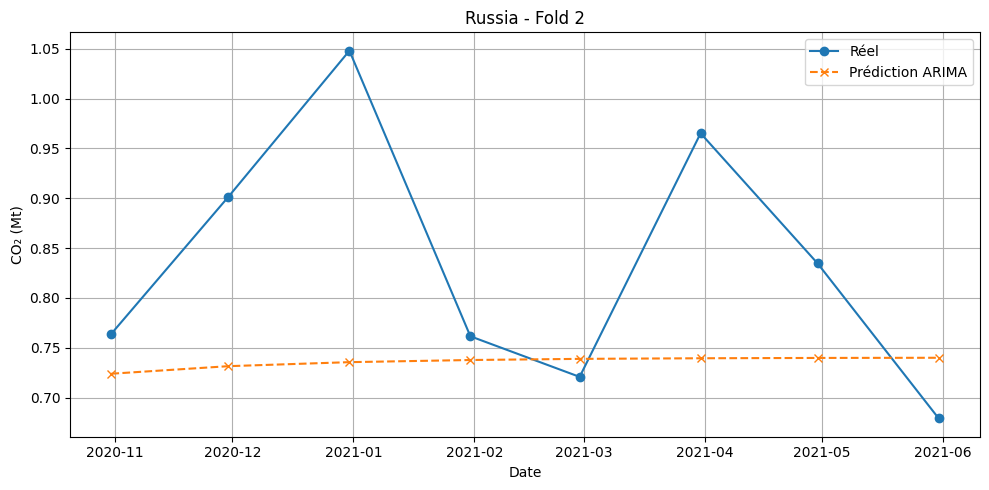

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


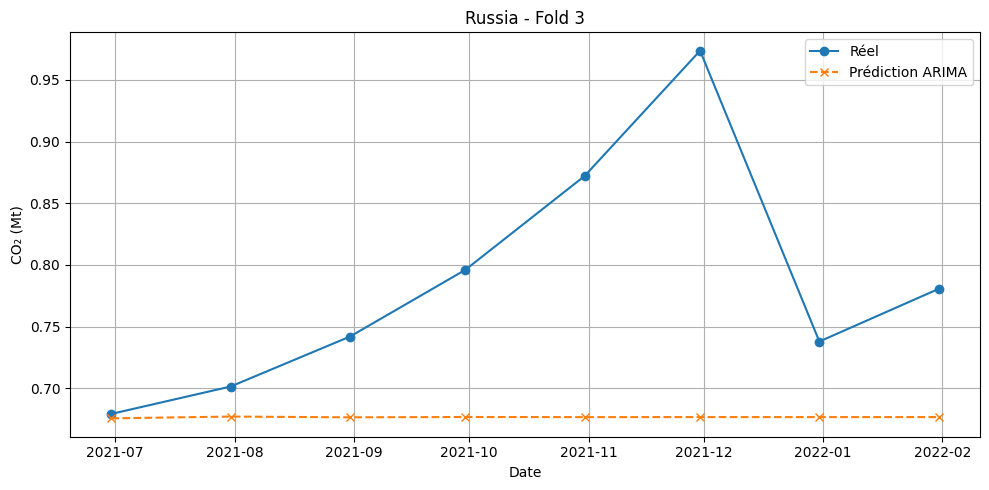

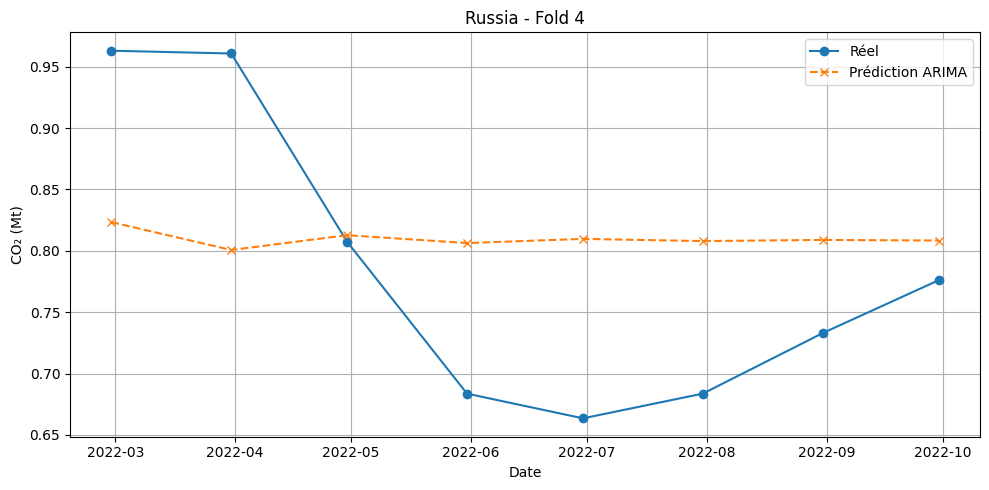

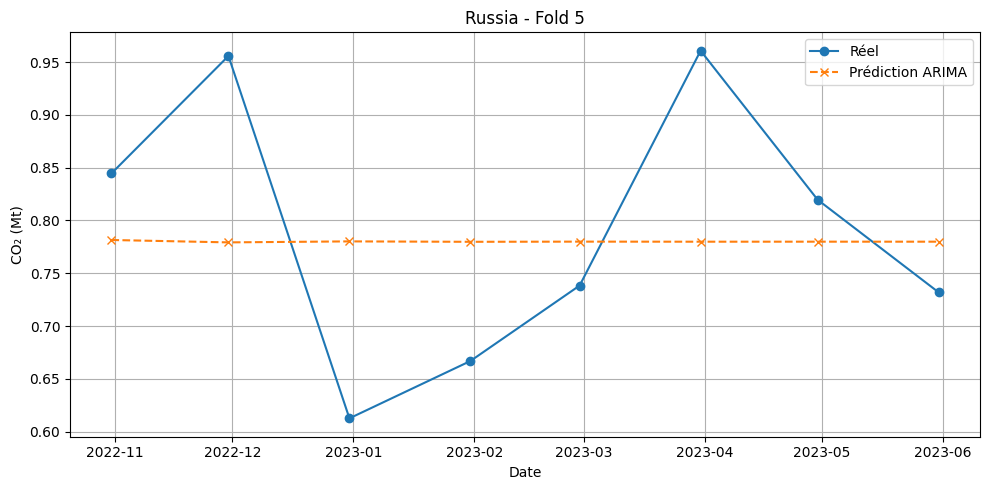


📈 Résultats pour Russia :
     Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0  Russia     1  0.005219  0.072245  0.057335  0.128001        0.060169   
1  Russia     2  0.024080  0.155178  0.118208 -0.682638        0.076485   
2  Russia     3  0.020008  0.141448  0.108789 -1.442174        0.158034   
3  Russia     4  0.012979  0.113925  0.100818 -0.026474        0.078959   
4  Russia     5  0.014290  0.119539  0.103780 -0.010122        0.081249   

   Pred Time (s)  Nb Parameters  
0       0.002591              3  
1       0.003424              3  
2       0.003251              3  
3       1.098411              3  
4       0.002592              3  

=== Traitement pour le pays : Spain ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


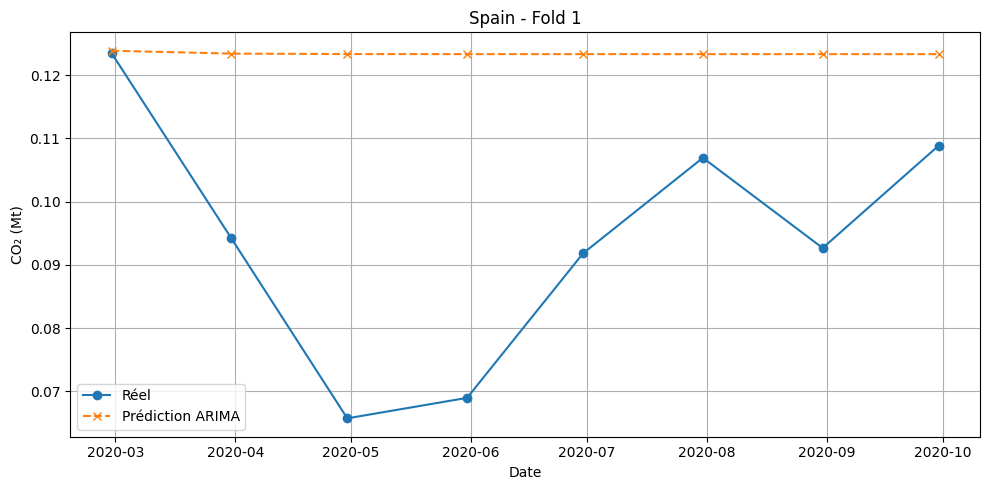

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


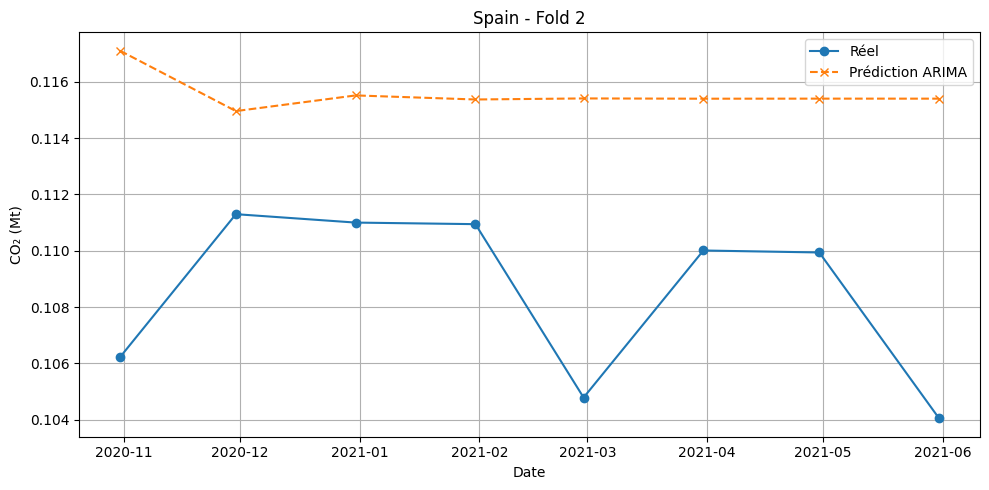

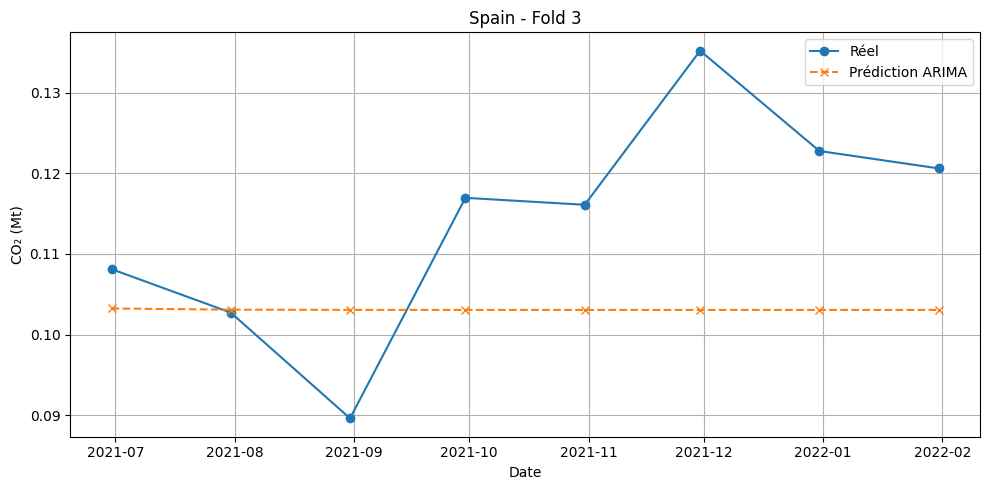

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


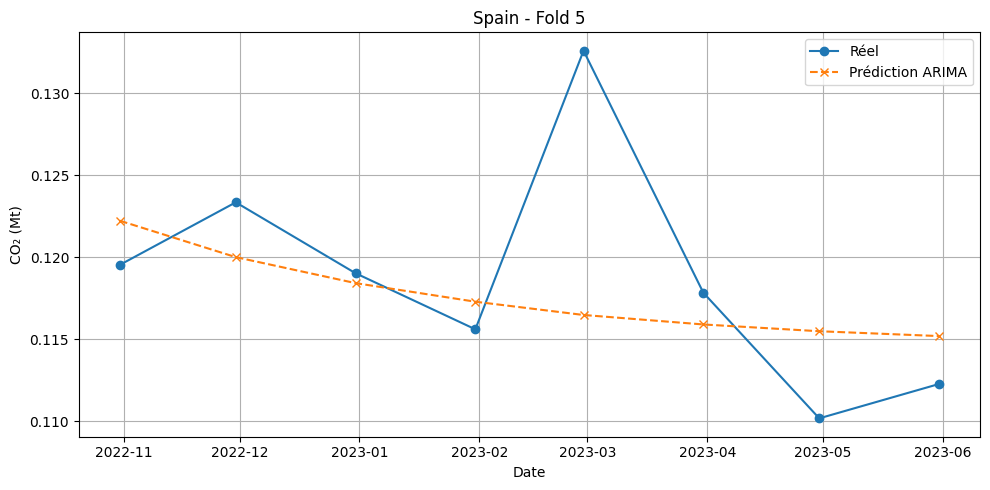


📈 Résultats pour Spain :
    Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0  Spain     1  0.001192  0.034519  0.029313 -2.544623        0.143311   
1  Spain     2  0.000059  0.007682  0.007037 -6.475656        0.171824   
2  Spain     3  0.000287  0.016942  0.014375 -0.715194        0.106774   
3  Spain     4  0.000059  0.007677  0.006163 -0.085982        0.067724   
4  Spain     5  0.000040  0.006340  0.004324  0.052676        1.101426   

   Pred Time (s)  Nb Parameters  
0       0.003086              3  
1       0.002623              3  
2       0.002988              3  
3       0.003155              3  
4       0.006070              3  

=== Traitement pour le pays : UK ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


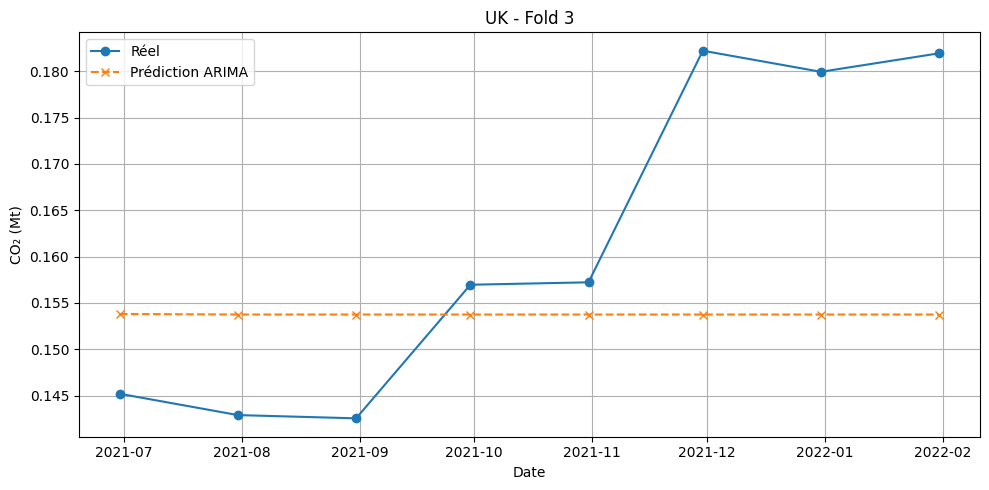

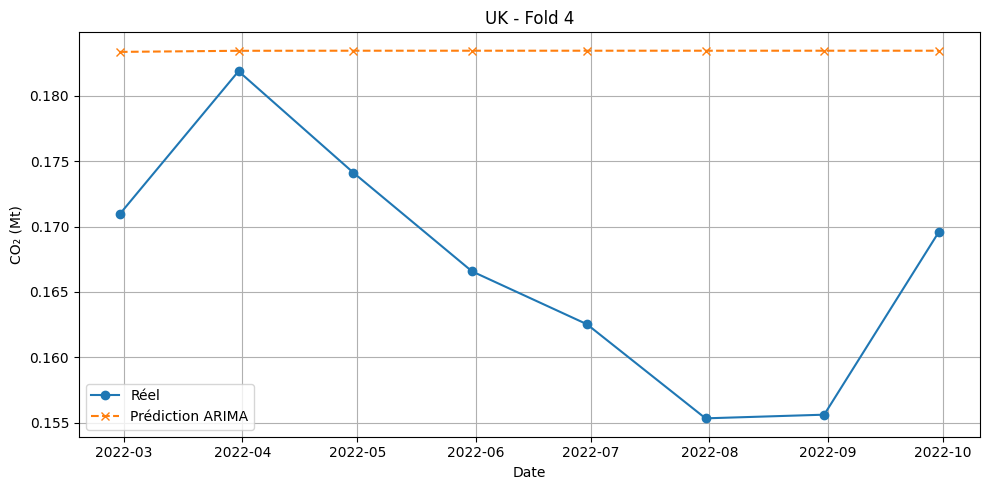

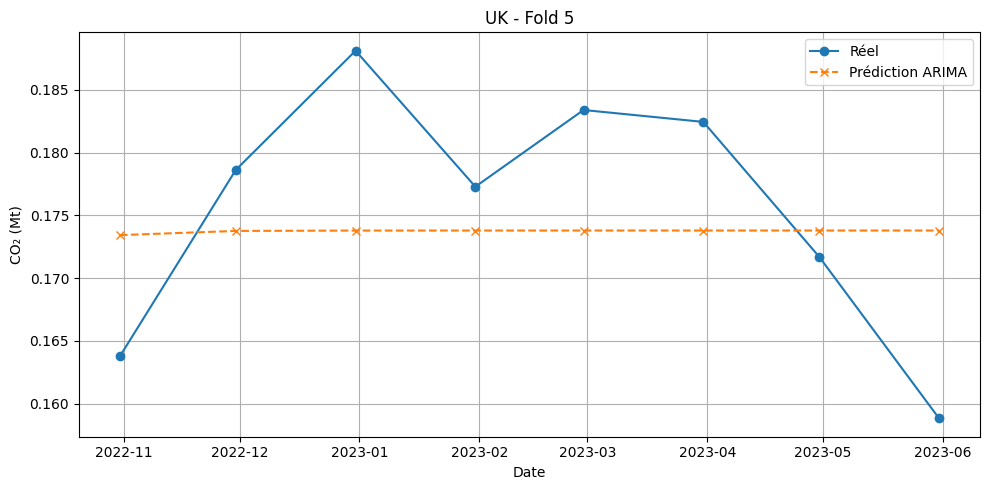


📈 Résultats pour UK :
  Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0   UK     1  0.002455  0.049550  0.043912 -3.707462        0.500630   
1   UK     2  0.000154  0.012404  0.010315 -1.132696        0.241233   
2   UK     3  0.000329  0.018129  0.015021 -0.198167        0.124850   
3   UK     4  0.000340  0.018447  0.016359 -3.688983        0.103148   
4   UK     5  0.000091  0.009554  0.008459 -0.023927        0.170603   

   Pred Time (s)  Nb Parameters  
0       0.005631              3  
1       0.011410              3  
2       0.002623              3  
3       0.003288              3  
4       0.003368              3  

=== Traitement pour le pays : US ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


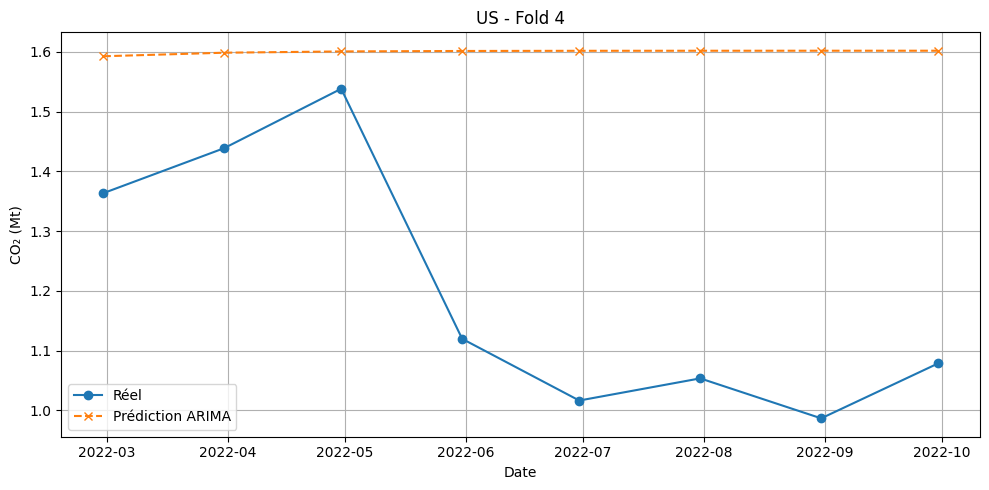

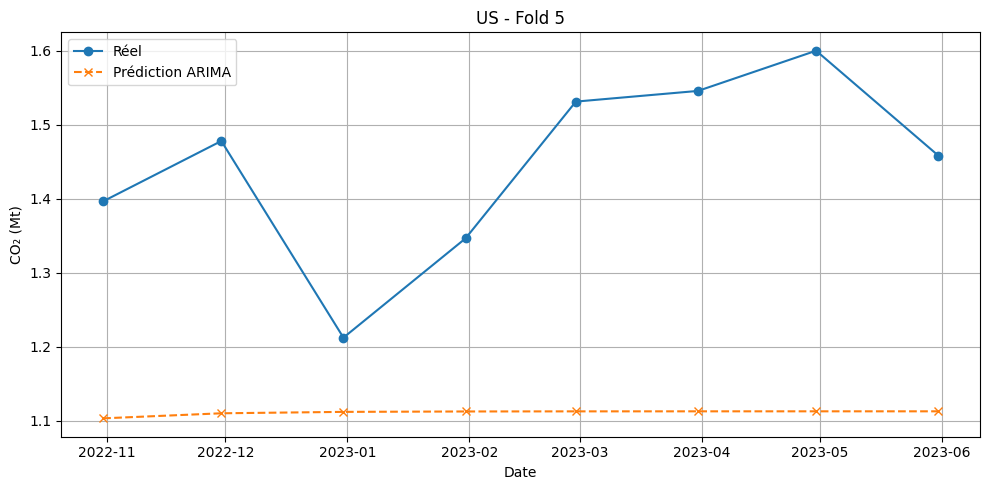


📈 Résultats pour US :
  Pays  Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0   US     1  0.330391  0.574796  0.427586 -1.321222        0.048044   
1   US     2  0.109327  0.330646  0.302047 -4.840544        0.087487   
2   US     3  0.139288  0.373213  0.347718 -0.154348        0.102197   
3   US     4  0.201160  0.448508  0.400629 -4.031124        0.103577   
4   US     5  0.125832  0.354728  0.335139 -8.220002        0.097689   

   Pred Time (s)  Nb Parameters  
0       0.002551              3  
1       0.004647              3  
2       0.003233              3  
3       0.002609              3  
4       0.003009              3  

=== Traitement pour le pays : WORLD ===


<ipython-input-34-b9f8f1a8ccb8>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


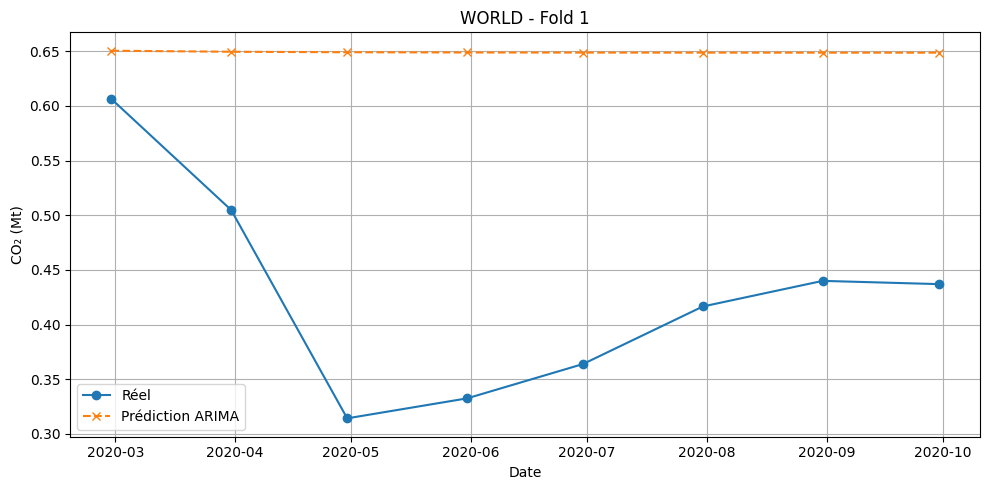

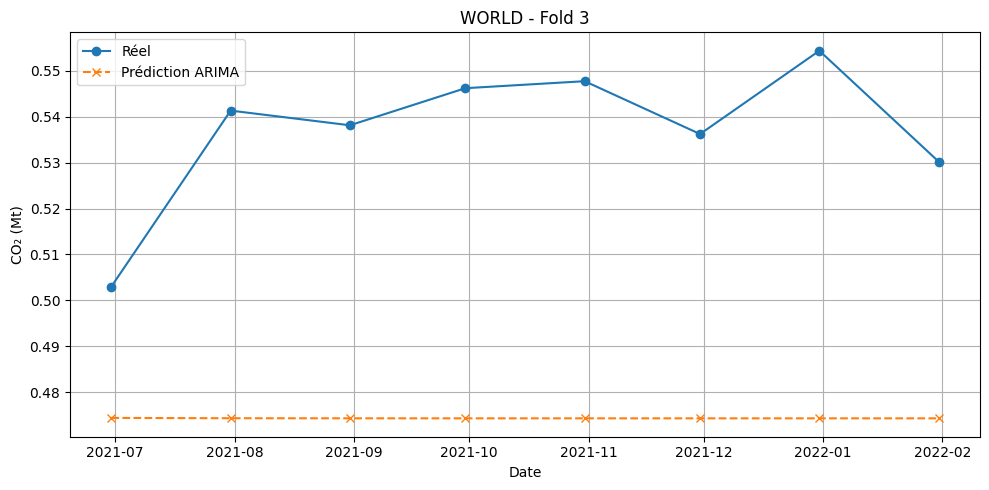


📈 Résultats pour WORLD :
    Pays  Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0  WORLD     1  0.057297  0.239367  0.222157  -6.141357        0.236625   
1  WORLD     2  0.000639  0.025270  0.020517  -1.199784        0.143987   
2  WORLD     3  0.004166  0.064544  0.062846 -18.330076        0.122811   
3  WORLD     4  0.004595  0.067789  0.057536  -2.762849        0.114984   
4  WORLD     5  0.000637  0.025239  0.019174  -0.255536        0.109852   

   Pred Time (s)  Nb Parameters  
0       0.004404              3  
1       0.002563              3  
2       0.006214              3  
3       0.003206              3  
4       0.003166              3  

✅ Traitement terminé pour tous les pays !


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

#  Charger le dataset prétraité
df = pd.read_csv("dataset_preprocessed.csv", parse_dates=['date'])

#  Liste des pays
pays_list = ['Brazil', 'China', 'EU27 & UK', 'France', 'Germany', 'India',
             'Italy', 'Japan', 'ROW', 'Russia', 'Spain', 'UK', 'US', 'WORLD']

#  Créer un dossier pour sauvegarder les résultats
os.makedirs("resultats", exist_ok=True)
os.makedirs("plots", exist_ok=True)

#  Boucle sur chaque pays
for pays in pays_list:
    print(f"\n=== Traitement pour le pays : {pays} ===")

    # Extraire les données du pays
    df_pays = df[df['country'] == pays].copy()

    if df_pays.empty:
        print(f"Aucune donnée pour {pays}, passage au suivant.")
        continue

    # Agréger par mois
    df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()

    # Initialiser TimeSeriesSplit
    n_splits = 5
    tscv = TimeSeriesSplit(n_splits=n_splits)

    results = []

    for fold, (train_idx, val_idx) in enumerate(tscv.split(df_pays_monthly)):
        train_fold = df_pays_monthly.iloc[train_idx]
        val_fold = df_pays_monthly.iloc[val_idx]

        y_train = train_fold['value']
        y_val = val_fold['value']

        try:
            # Entraîner le modèle ARIMA
            start_train = time.time()
            p, d, q = 1, 1, 1  # Ajustable
            model = sm.tsa.ARIMA(y_train, order=(p, d, q))
            model_fit = model.fit()
            end_train = time.time()
            train_time = end_train - start_train

            # Prédire
            start_pred = time.time()
            val_pred = model_fit.forecast(steps=len(y_val))
            end_pred = time.time()
            pred_time = end_pred - start_pred

            # Calculer les métriques
            mse = mean_squared_error(y_val, val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val, val_pred)
            r2 = r2_score(y_val, val_pred)

            # Stocker
            results.append({
                'Pays': pays,
                'Fold': fold + 1,
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2,
                'Train Time (s)': train_time,
                'Pred Time (s)': pred_time,
                'Nb Parameters': len(model_fit.params)
            })

            # Plot réel vs prédiction
            plt.figure(figsize=(10, 5))
            plt.plot(val_fold['date'], y_val, label="Réel", marker='o')
            plt.plot(val_fold['date'], val_pred, label="Prédiction ARIMA", linestyle='--', marker='x')
            plt.title(f"{pays} - Fold {fold + 1}")
            plt.xlabel("Date")
            plt.ylabel("CO₂ (Mt)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            # Sauvegarder le graphe
            os.makedirs(f"plots/{pays}", exist_ok=True)
            plt.savefig(f"plots/{pays}/fold_{fold + 1}.png")
            plt.close()

        except Exception as e:
            print(f"❌ Erreur sur le Fold {fold + 1} pour {pays} : {e}")

    #  Résultats pour ce pays
    df_results = pd.DataFrame(results)
    print(f"\n📈 Résultats pour {pays} :")
    print(df_results)

    # Sauvegarder les résultats en CSV
    df_results.to_csv(f"resultats/{pays}_results.csv", index=False)

print("\n Traitement terminé pour tous les pays !")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import os

# Charger le dataset
df = pd.read_csv("dataset_preprocessed.csv", parse_dates=['date'])

#  Liste des pays
pays_list = df['country'].unique()

# créer un dossier pour sauvegarder les résultats et graphiques
os.makedirs("resultats", exist_ok=True)
os.makedirs("plots", exist_ok=True)

#  Boucle sur chaque pays
for pays in pays_list:
    print(f"\n=== Traitement pour le pays : {pays} ===")

    # Filtrer les données pour ce pays
    df_pays = df[df['country'] == pays].copy()
    df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()

    # Initialiser TimeSeriesSplit
    n_splits = 5
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Stocker les résultats pour ce pays
    results = []

    print(f"\nValidation croisée avec TimeSeriesSplit pour {pays} (n_splits={n_splits}):")
    for fold, (train_idx, val_idx) in enumerate(tscv.split(df_pays_monthly)):
        train_fold = df_pays_monthly.iloc[train_idx]
        val_fold = df_pays_monthly.iloc[val_idx]

        y_train = train_fold['value']
        y_val = val_fold['value']

        print(f"\n🔹 Fold {fold + 1}")
        print(f"Train size: {len(train_fold)}, Validation size: {len(val_fold)}")

        try:
            # Entraîner le modèle SARIMA
            start_train = time.time()

            # Choisir un modèle SARIMA avec les paramètres (p, d, q) et saisonniers (P, D, Q, S)
            p, d, q = 1, 1, 1  # Paramètres ARIMA
            P, D, Q, S = 1, 1, 1, 12  # Paramètres saisonniers (S = 12 pour une saisonnalité mensuelle)

            model = sm.tsa.SARIMAX(y_train,
                                  order=(p, d, q),
                                  seasonal_order=(P, D, Q, S))
            model_fit = model.fit()
            end_train = time.time()
            train_time = end_train - start_train

            print(f" Modèle SARIMA entraîné en {train_time:.2f} secondes")

            # Prédiction sur validation
            start_pred = time.time()
            val_pred = model_fit.forecast(steps=len(y_val))
            end_pred = time.time()
            pred_time = end_pred - start_pred

            # Calculer les métriques
            mse = mean_squared_error(y_val, val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val, val_pred)
            r2 = r2_score(y_val, val_pred)

            # Stocker les résultats
            results.append({
                'Fold': fold + 1,
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2,
                'Train Time (s)': train_time,
                'Pred Time (s)': pred_time,
                'Nb Parameters': len(model_fit.params)
            })

            # Visualisation sur validation
            plt.figure(figsize=(10, 5))
            plt.plot(val_fold['date'], y_val, label="Réel", marker='o')
            plt.plot(val_fold['date'], val_pred, label="Prédictions SARIMA", linestyle='--', marker='x')
            plt.title(f"{pays} - Fold {fold + 1} - Réel vs Prédictions")
            plt.xlabel("Date")
            plt.ylabel("CO₂ moyen (Mt)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()

            # Sauvegarder le graphe
            os.makedirs(f"plots/{pays}", exist_ok=True)
            plt.savefig(f"plots/{pays}/fold_{fold + 1}.png")
            plt.close()

        except Exception as e:
            print(f" Erreur sur le Fold {fold + 1} pour {pays} : {e}")

    # Enregistrer les résultats pour ce pays
    df_results = pd.DataFrame(results)
    print(f"\n📈 Résultats pour {pays} :")
    print(df_results)

    # Sauvegarder les résultats en CSV
    df_results.to_csv(f"resultats/{pays}_results.csv", index=False)

print("\n Traitement terminé pour tous les pays !")



=== Traitement pour le pays : Brazil ===

Validation croisée avec TimeSeriesSplit pour Brazil (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


✅ Modèle SARIMA entraîné en 0.23 secondes

🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 3.29 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 2.53 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 1.02 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 1.55 secondes

📈 Résultats pour Brazil :
   Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0     1  0.004890  0.069928  0.068200 -11.099893        0.234146   
1     2  0.003773  0.061424  0.055202 -42.682050        3.288353   
2     3  0.000371  0.019263  0.015307  -0.493461        2.527140   
3     4  0.000277  0.016640  0.013275  -7.188895        1.018888   
4     5  0.000359  0.018949  0.016371 -10.603266        1.554558   

   Pred Time (s)  Nb Parameters  
0       0.004092              5  
1       0.003291              5  
2       0.010436              5  
3       0.003713              5  
4       0.008783              5  

=== Traitement pour le pays : Germany ===

Validation croisée avec TimeSeriesSplit pour Germany (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


✅ Modèle SARIMA entraîné en 0.25 secondes

🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 1.31 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 0.97 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 1.09 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 0.80 secondes

📈 Résultats pour Germany :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.001231  0.035090  0.033553 -0.001351        0.254375   
1     2  0.003108  0.055746  0.046377 -1.379245        1.305610   
2     3  0.000146  0.012079  0.009995  0.951610        0.973024   
3     4  0.000983  0.031354  0.027070  0.278792        1.086715   
4     5  0.001722  0.041497  0.036435  0.155563        0.795560   

   Pred Time (s)  Nb Parameters  
0       0.003466              5  
1       0.009632              5  
2       0.004555              5  
3       0.003606              5  
4       0.003342              5  

=== Traitement pour le pays : France ===

Validation croisée avec TimeSeriesSplit pour France (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.03 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8
✅ Modèle SARIMA entraîné en 0.19 secondes


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 0.86 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 1.04 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 1.58 secondes

📈 Résultats pour France :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.000520  0.022809  0.013689 -0.006269        0.026294   
1     2  0.000797  0.028224  0.019869 -2.633245        0.185297   
2     3  0.000055  0.007417  0.006350  0.925310        0.856532   
3     4  0.000558  0.023629  0.015194 -0.565324        1.038797   
4     5  0.000062  0.007876  0.006455  0.803177        1.583083   

   Pred Time (s)  Nb Parameters  
0       0.003541              5  
1       0.006016              5  
2       0.003844              5  
3       0.003721              5  
4       0.003276              5  

=== Traitement pour le pays : EU27 & UK ===

Validation croisée avec TimeSeriesSplit pour EU27 & UK (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.06 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 1.11 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 2.57 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.40 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.74 secondes

📈 Résultats pour EU27 & UK :
   Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0     1  0.039760  0.199400  0.154893  -0.311248        0.062377   
1     2  0.163263  0.404058  0.282396 -10.568419        1.105353   
2     3  0.006466  0.080411  0.064658   0.854288        2.565295   
3     4  0.029717  0.172387  0.141458  -0.520366        0.396201   
4     5  0.017324  0.131619  0.116286   0.176574        0.735743   

   Pred Time (s)  Nb Parameters  
0       0.003052              5  
1       0.005062              5  
2       0.003461              5  
3       0.003282              5  
4       0.003453              5  

=== Traitement pour le pays : China ===

Validation croisée avec TimeSeriesSplit pour China (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.03 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.36 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.85 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 1.00 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.58 secondes

📈 Résultats pour China :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.010920  0.104500  0.070341 -8.719959        0.027440   
1     2  0.013592  0.116583  0.097678 -1.780711        0.357156   
2     3  0.000933  0.030553  0.026418  0.941838        0.848449   
3     4  0.001992  0.044635  0.040004  0.268709        1.002000   
4     5  0.005915  0.076907  0.065390  0.315942        0.583740   

   Pred Time (s)  Nb Parameters  
0       0.005889              5  
1       0.003100              5  
2       0.003776              5  
3       0.003543              5  
4       0.004499              5  

=== Traitement pour le pays : WORLD ===

Validation croisée avec TimeSeriesSplit pour WORLD (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.02 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.43 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.95 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.77 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 3.49 secondes

📈 Résultats pour WORLD :
   Fold       MSE      RMSE       MAE          R2  Train Time (s)  \
0     1  0.081232  0.285012  0.266339   -9.124582        0.024444   
1     2  0.043364  0.208241  0.142266 -148.380623        0.434083   
2     3  0.002993  0.054706  0.048600  -12.886463        0.946840   
3     4  0.081917  0.286211  0.265672  -66.076793        0.769386   
4     5  0.005449  0.073815  0.051709   -9.739357        3.487241   

   Pred Time (s)  Nb Parameters  
0       0.003203              5  
1       0.003485              5  
2       0.003108              5  
3       0.004046              5  
4       0.003119              5  

=== Traitement pour le pays : US ===

Validation croisée avec TimeSeriesSplit pour US (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.03 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 0.65 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.52 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.36 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.94 secondes

📈 Résultats pour US :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.017545  0.132458  0.097576  0.876734        0.029990   
1     2  0.174166  0.417332  0.367200 -8.304403        0.648805   
2     3  0.006853  0.082784  0.068063  0.943204        0.522098   
3     4  0.048092  0.219299  0.174488 -0.202812        0.361366   
4     5  0.073389  0.270904  0.215795 -4.377387        0.942650   

   Pred Time (s)  Nb Parameters  
0       0.003537              5  
1       0.003458              5  
2       0.003116              5  
3       0.003150              5  
4       0.003178              5  

=== Traitement pour le pays : UK ===

Validation croisée avec TimeSeriesSplit pour UK (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.03 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.81 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 0.95 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 1.09 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 1.28 secondes

📈 Résultats pour UK :
   Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0     1  0.000447  0.021149  0.017925   0.142411        0.026641   
1     2  0.000927  0.030442  0.021976 -11.844633        0.805665   
2     3  0.000040  0.006333  0.005958   0.853789        0.953271   
3     4  0.001277  0.035739  0.031703 -16.600271        1.094347   
4     5  0.000101  0.010058  0.007701  -0.134935        1.279733   

   Pred Time (s)  Nb Parameters  
0       0.005697              5  
1       0.003513              5  
2       0.003066              5  
3       0.003087              5  
4       0.003060              5  

=== Traitement pour le pays : Spain ===

Validation croisée avec TimeSeriesSplit pour Spain (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.05 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 2.53 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 1.23 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.37 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 1.57 secondes

📈 Résultats pour Spain :
   Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0     1  0.000719  0.026813  0.022137  -1.138609        0.050959   
1     2  0.000606  0.024622  0.021497 -75.799866        2.527558   
2     3  0.000127  0.011291  0.009005   0.238191        1.228502   
3     4  0.000414  0.020354  0.019032  -6.634432        0.371209   
4     5  0.000070  0.008376  0.007404  -0.653725        1.574960   

   Pred Time (s)  Nb Parameters  
0       0.003628              5  
1       0.003042              5  
2       0.003232              5  
3       0.007372              5  
4       0.003091              5  

=== Traitement pour le pays : Russia ===

Validation croisée avec TimeSeriesSplit pour Russia (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.04 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.85 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.30 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 0.84 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.51 secondes

📈 Résultats pour Russia :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.015130  0.123004  0.106320 -1.527805        0.035342   
1     2  0.010740  0.103634  0.072588  0.249534        0.852195   
2     3  0.019029  0.137947  0.065922 -1.322774        0.298671   
3     4  0.006368  0.079799  0.059817  0.496382        0.836684   
4     5  0.024204  0.155577  0.101825 -0.710996        0.508298   

   Pred Time (s)  Nb Parameters  
0       0.004078              5  
1       0.004110              5  
2       0.003642              5  
3       0.003583              5  
4       0.003047              5  

=== Traitement pour le pays : ROW ===

Validation croisée avec TimeSeriesSplit pour ROW (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.03 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.49 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 2.31 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.91 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.75 secondes

📈 Résultats pour ROW :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.015917  0.126162  0.112548  0.591995        0.030863   
1     2  0.009493  0.097433  0.071815  0.587045        0.489645   
2     3  0.010186  0.100925  0.083812  0.437825        2.307563   
3     4  0.008990  0.094817  0.080729 -0.026531        0.914808   
4     5  0.001258  0.035468  0.029602  0.948727        0.750686   

   Pred Time (s)  Nb Parameters  
0       0.003671              5  
1       0.016256              5  
2       0.008880              5  
3       0.003556              5  
4       0.003433              5  

=== Traitement pour le pays : Japan ===

Validation croisée avec TimeSeriesSplit pour Japan (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.03 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8
✅ Modèle SARIMA entraîné en 0.18 secondes


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.38 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.78 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.73 secondes

📈 Résultats pour Japan :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.000426  0.020639  0.015211  0.893784        0.027042   
1     2  0.001766  0.042028  0.038846  0.666769        0.179507   
2     3  0.000496  0.022269  0.018449  0.863525        0.376189   
3     4  0.000728  0.026980  0.024187  0.812304        0.784581   
4     5  0.000823  0.028682  0.025800  0.820688        0.726838   

   Pred Time (s)  Nb Parameters  
0       0.003092              5  
1       0.003119              5  
2       0.003902              5  
3       0.006136              5  
4       0.003119              5  

=== Traitement pour le pays : Italy ===

Validation croisée avec TimeSeriesSplit pour Italy (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.03 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 0.86 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.92 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ Modèle SARIMA entraîné en 0.80 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.58 secondes

📈 Résultats pour Italy :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.000265  0.016274  0.011434  0.399914        0.034058   
1     2  0.000424  0.020595  0.014727 -0.934484        0.860983   
2     3  0.000338  0.018375  0.015448  0.490799        0.918292   
3     4  0.000486  0.022039  0.020080 -0.078028        0.802411   
4     5  0.000063  0.007922  0.007731  0.823805        0.580047   

   Pred Time (s)  Nb Parameters  
0       0.004102              5  
1       0.003217              5  
2       0.003419              5  
3       0.003107              5  
4       0.009409              5  

=== Traitement pour le pays : India ===

Validation croisée avec TimeSeriesSplit pour India (n_splits=5):

🔹 Fold 1
Train size: 13, Validation size: 8
✅ Modèle SARIMA entraîné en 0.10 secondes


<ipython-input-35-57b6b024dd67>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /



🔹 Fold 2
Train size: 21, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 1.18 secondes

🔹 Fold 3
Train size: 29, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.39 secondes

🔹 Fold 4
Train size: 37, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.30 secondes

🔹 Fold 5
Train size: 45, Validation size: 8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


✅ Modèle SARIMA entraîné en 0.74 secondes

📈 Résultats pour India :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.068275  0.261295  0.195810 -1.589885        0.096660   
1     2  0.010347  0.101719  0.081170  0.710465        1.180058   
2     3  0.009311  0.096496  0.088899  0.256334        0.394928   
3     4  0.025797  0.160615  0.126424  0.467926        0.295709   
4     5  0.077066  0.277609  0.216545 -0.714949        0.742310   

   Pred Time (s)  Nb Parameters  
0       0.010473              5  
1       0.012079              5  
2       0.003091              5  
3       0.003157              5  
4       0.003067              5  

✅ Traitement terminé pour tous les pays !


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

#  Charger le dataset
df = pd.read_csv("dataset_preprocessed.csv", parse_dates=['date'])

#  Liste des pays
pays_list = df['country'].unique()

#  Créer un dossier pour sauvegarder les résultats et graphiques
os.makedirs("resultats", exist_ok=True)
os.makedirs("plots", exist_ok=True)

#  Boucle sur chaque pays
for pays in pays_list:
    print(f"\n=== Traitement pour le pays : {pays} ===")

    # Filtrer les données pour ce pays
    df_pays = df[df['country'] == pays].copy()
    df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()

    # 🔹 Normaliser les données
    scaler = MinMaxScaler()
    df_pays_monthly['value_scaled'] = scaler.fit_transform(df_pays_monthly[['value']])

    # 🔹 Créer les séquences pour LSTM
    def create_sequences(data, seq_length):
        xs, ys = [], []
        for i in range(len(data) - seq_length):
            x = data[i:(i + seq_length)]
            y = data[i + seq_length]
            xs.append(x)
            ys.append(y)
        return np.array(xs), np.array(ys)

    SEQ_LENGTH = 12  # 12 mois
    X, y = create_sequences(df_pays_monthly['value_scaled'].values, SEQ_LENGTH)

    #  Validation croisée
    n_splits = 5
    tscv = TimeSeriesSplit(n_splits=n_splits)
    results = []

    print(f"\nValidation croisée avec TimeSeriesSplit pour {pays} (n_splits={n_splits}):")
    for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        X_train = np.expand_dims(X_train, axis=-1)  # Ajouter la dimension 'features'
        X_val = np.expand_dims(X_val, axis=-1)

        print(f"\n Fold {fold + 1}")
        print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}")

        try:
            start_train = time.time()

            model = Sequential()
            model.add(LSTM(64, activation='relu', input_shape=(SEQ_LENGTH, 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mse')

            history = model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)
            end_train = time.time()
            train_time = end_train - start_train

            print(f" Modèle LSTM entraîné en {train_time:.2f} secondes")

            start_pred = time.time()
            val_pred = model.predict(X_val).flatten()
            end_pred = time.time()
            pred_time = end_pred - start_pred

            #  Inverser la normalisation
            y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
            val_pred_inv = scaler.inverse_transform(val_pred.reshape(-1, 1)).flatten()

            #  Calculer les métriques
            mse = mean_squared_error(y_val_inv, val_pred_inv)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_inv, val_pred_inv)
            r2 = r2_score(y_val_inv, val_pred_inv)

            results.append({
                'Fold': fold + 1,
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2,
                'Train Time (s)': train_time,
                'Pred Time (s)': pred_time,
                'Nb Parameters': model.count_params()
            })

            # Visualisation
            plt.figure(figsize=(10, 5))
            plt.plot(range(len(y_val_inv)), y_val_inv, label="Réel", marker='o')
            plt.plot(range(len(val_pred_inv)), val_pred_inv, label="Prédictions LSTM", linestyle='--', marker='x')
            plt.title(f"{pays} - Fold {fold + 1} - Réel vs Prédictions")
            plt.xlabel("Index")
            plt.ylabel("CO₂ moyen (Mt)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()

            # Sauvegarder le graphe
            os.makedirs(f"plots/{pays}", exist_ok=True)
            plt.savefig(f"plots/{pays}/fold_{fold + 1}.png")
            plt.close()
            plt.show()

        except Exception as e:
            print(f" Erreur sur le Fold {fold + 1} pour {pays} : {e}")

    # Enregistrer les résultats pour ce pays
    df_results = pd.DataFrame(results)
    print(f"\n Résultats pour {pays} :")
    print(df_results)

    # Sauvegarder les résultats en CSV
    df_results.to_csv(f"resultats/{pays}_results.csv", index=False)

print("\n Traitement terminé pour tous les pays !")



=== Traitement pour le pays : Brazil ===

Validation croisée avec TimeSeriesSplit pour Brazil (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.37 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.65 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.60 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.77 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 5.00 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step

📈 Résultats pour Brazil :
   Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0     1  0.000667  0.025817  0.024642 -12.760797        4.366340   
1     2  0.001403  0.037461  0.037345 -55.573243        3.647661   
2     3  0.001070  0.032707  0.032051  -9.255558        4.600285   
3     4  0.000054  0.007370  0.006121  -7.597607        3.770725   
4     5  0.000120  0.010941  0.009743  -9.027937        4.998682   

   Pred Time (s)  Nb Parameters  
0       0.237799          16961  
1       0.239939          16961  
2       0.366058          16961  
3       0.366492          16961  
4       0.401446          16961  

=== Traitement pour le pays : Germany ===

Validation croisée avec TimeSeriesSplit pour Germany (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 5.16 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.90 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.58 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.00 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 5.20 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step

📈 Résultats pour Germany :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.004106  0.064079  0.059574 -1.678887        5.164665   
1     2  0.002386  0.048851  0.042314  0.011632        3.904092   
2     3  0.001677  0.040945  0.036240 -0.306411        4.575928   
3     4  0.001499  0.038714  0.036057 -0.306418        3.998206   
4     5  0.001512  0.038886  0.031483  0.340565        5.197848   

   Pred Time (s)  Nb Parameters  
0       0.375345          16961  
1       0.382553          16961  
2       0.368465          16961  
3       0.242586          16961  
4       0.252738          16961  

=== Traitement pour le pays : France ===

Validation croisée avec TimeSeriesSplit pour France (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.49 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.23 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.70 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.02 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.65 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step

📈 Résultats pour France :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.000947  0.030771  0.027657 -2.920684        3.491247   
1     2  0.000561  0.023685  0.017762 -0.115073        4.226260   
2     3  0.000539  0.023225  0.020894 -1.039564        4.701387   
3     4  0.000498  0.022309  0.020294 -1.035082        4.019152   
4     5  0.000457  0.021374  0.018535 -0.383546        4.654996   

   Pred Time (s)  Nb Parameters  
0       0.366354          16961  
1       0.249567          16961  
2       0.239699          16961  
3       0.237676          16961  
4       0.392190          16961  

=== Traitement pour le pays : EU27 & UK ===

Validation croisée avec TimeSeriesSplit pour EU27 & UK (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.95 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.03 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.83 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.33 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 5.15 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step

📈 Résultats pour EU27 & UK :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.061606  0.248206  0.225701 -2.780673        3.952267   
1     2  0.032916  0.181427  0.157264  0.037777        4.029423   
2     3  0.044093  0.209984  0.189678 -1.634715        4.834050   
3     4  0.014661  0.121082  0.106421  0.043018        4.333676   
4     5  0.014708  0.121278  0.102746  0.405126        5.149595   

   Pred Time (s)  Nb Parameters  
0       0.263405          16961  
1       0.312995          16961  
2       1.423518          16961  
3       0.280965          16961  
4       0.262254          16961  

=== Traitement pour le pays : China ===

Validation croisée avec TimeSeriesSplit pour China (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.24 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.82 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.67 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.86 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.94 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step

📈 Résultats pour China :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.011575  0.107587  0.096160 -1.401561        4.242776   
1     2  0.009523  0.097588  0.088231 -0.337642        3.818748   
2     3  0.019784  0.140655  0.117429 -0.125734        4.670748   
3     4  0.005239  0.072383  0.066679 -0.666617        3.862839   
4     5  0.015935  0.126233  0.090649 -0.540202        4.944198   

   Pred Time (s)  Nb Parameters  
0       0.249152          16961  
1       0.368387          16961  
2       0.368977          16961  
3       0.364250          16961  
4       0.392249          16961  

=== Traitement pour le pays : WORLD ===

Validation croisée avec TimeSeriesSplit pour WORLD (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.07 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.92 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.77 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.73 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.90 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step

📈 Résultats pour WORLD :
   Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0     1  0.002635  0.051328  0.046973  -6.622023        4.068563   
1     2  0.012225  0.110568  0.109837 -52.863286        3.921681   
2     3  0.003108  0.055750  0.053969 -15.181268        4.765495   
3     4  0.006779  0.082332  0.079316 -18.643429        3.725022   
4     5  0.004470  0.066861  0.064565  -9.524427        4.899712   

   Pred Time (s)  Nb Parameters  
0       0.379956          16961  
1       0.255180          16961  
2       0.367521          16961  
3       0.367243          16961  
4       0.396393          16961  

=== Traitement pour le pays : US ===

Validation croisée avec TimeSeriesSplit pour US (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.52 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 5.32 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.97 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.88 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 5.25 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

📈 Résultats pour US :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.011576  0.107594  0.086606 -0.156882        3.516698   
1     2  0.197283  0.444166  0.405882 -1.673326        5.316416   
2     3  0.031387  0.177163  0.159119 -0.315095        4.970636   
3     4  0.042297  0.205662  0.194754 -0.127296        3.879447   
4     5  0.048813  0.220936  0.195084 -1.772101        5.246289   

   Pred Time (s)  Nb Parameters  
0       0.234098          16961  
1       0.302618          16961  
2       0.269562          16961  
3       0.372212          16961  
4       0.366630          16961  

=== Traitement pour le pays : UK ===

Validation croisée avec TimeSeriesSplit pour UK (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.65 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.73 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.68 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.48 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 13.12 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step

📈 Résultats pour UK :
   Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0     1  0.000852  0.029183  0.027948 -16.360603        3.652314   
1     2  0.000191  0.013822  0.011146  -0.000992        3.731211   
2     3  0.000259  0.016090  0.014986  -6.655463        4.681496   
3     4  0.000070  0.008365  0.007486  -0.068875        4.481156   
4     5  0.000165  0.012856  0.011570  -0.793838       13.124667   

   Pred Time (s)  Nb Parameters  
0       0.370117          16961  
1       0.367183          16961  
2       0.364003          16961  
3       0.289307          16961  
4       0.414616          16961  

=== Traitement pour le pays : Spain ===

Validation croisée avec TimeSeriesSplit pour Spain (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.82 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.79 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.85 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.56 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.09 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step

📈 Résultats pour Spain :
   Fold       MSE      RMSE       MAE         R2  Train Time (s)  \
0     1  0.000242  0.015548  0.015229 -27.936979        4.815634   
1     2  0.000318  0.017846  0.014737  -0.620132        3.792694   
2     3  0.000202  0.014217  0.012769  -6.585814        3.847990   
3     4  0.000081  0.008997  0.008659  -0.616949        4.556969   
4     5  0.000053  0.007271  0.005272  -0.011882        4.086000   

   Pred Time (s)  Nb Parameters  
0       0.238055          16961  
1       0.245729          16961  
2       0.369441          16961  
3       0.367046          16961  
4       0.363410          16961  

=== Traitement pour le pays : Russia ===

Validation croisée avec TimeSeriesSplit pour Russia (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.76 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.01 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 6.21 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 5.05 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.55 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

📈 Résultats pour Russia :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.021785  0.147596  0.119390 -0.244374        3.760223   
1     2  0.016707  0.129257  0.114182 -0.595933        4.005291   
2     3  0.011739  0.108348  0.095340 -0.047111        6.206887   
3     4  0.010505  0.102492  0.091017 -0.049662        5.051626   
4     5  0.015595  0.124880  0.106575 -0.241332        4.550246   

   Pred Time (s)  Nb Parameters  
0       0.393713          16961  
1       0.366535          16961  
2       0.378664          16961  
3       0.371548          16961  
4       0.249182          16961  

=== Traitement pour le pays : ROW ===

Validation croisée avec TimeSeriesSplit pour ROW (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.90 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.97 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.78 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.55 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.33 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

📈 Résultats pour ROW :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.038005  0.194948  0.165561 -0.453913        4.899104   
1     2  0.019463  0.139509  0.083447 -0.482664        3.966225   
2     3  0.025004  0.158126  0.138811 -0.219363        3.781301   
3     4  0.010530  0.102614  0.057155 -0.191768        4.546730   
4     5  0.023878  0.154524  0.134653 -0.019971        4.329263   

   Pred Time (s)  Nb Parameters  
0       0.371085          16961  
1       0.244186          16961  
2       0.244752          16961  
3       0.248243          16961  
4       0.256977          16961  

=== Traitement pour le pays : Japan ===

Validation croisée avec TimeSeriesSplit pour Japan (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.31 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.71 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.84 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.74 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.54 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step

📈 Résultats pour Japan :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.008030  0.089609  0.081167 -0.221625        4.310173   
1     2  0.000874  0.029564  0.027351 -0.582234        3.709606   
2     3  0.008611  0.092796  0.085721 -0.297055        3.838694   
3     4  0.000750  0.027395  0.021927 -2.231574        4.738444   
4     5  0.003994  0.063199  0.059939  0.295779        4.540021   

   Pred Time (s)  Nb Parameters  
0       0.726903          16961  
1       0.257606          16961  
2       0.247977          16961  
3       0.282066          16961  
4       0.366009          16961  

=== Traitement pour le pays : Italy ===

Validation croisée avec TimeSeriesSplit pour Italy (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.93 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.21 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.81 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 5.01 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.98 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

📈 Résultats pour Italy :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.000858  0.029295  0.027137 -2.325646        3.930117   
1     2  0.000433  0.020817  0.016656  0.001482        4.211199   
2     3  0.000743  0.027252  0.024001 -1.050511        3.811440   
3     4  0.000296  0.017197  0.014347 -0.746962        5.005465   
4     5  0.000296  0.017210  0.015350  0.288994        3.981583   

   Pred Time (s)  Nb Parameters  
0       0.355571          16961  
1       0.266136          16961  
2       0.254206          16961  
3       0.371413          16961  
4       0.367814          16961  

=== Traitement pour le pays : India ===

Validation croisée avec TimeSeriesSplit pour India (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-37-dfa0296e271c>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.50 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step

🔹 Fold 2
Train size: 17, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.53 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step

🔹 Fold 3
Train size: 23, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 3.99 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step

🔹 Fold 4
Train size: 29, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 5.08 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step

🔹 Fold 5
Train size: 35, Validation size: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Modèle LSTM entraîné en 4.24 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

📈 Résultats pour India :
   Fold       MSE      RMSE       MAE        R2  Train Time (s)  \
0     1  0.047740  0.218495  0.212800 -0.002304        3.500774   
1     2  0.003547  0.059553  0.054840 -3.276303        4.531676   
2     3  0.090850  0.301413  0.286548 -0.001165        3.990456   
3     4  0.020125  0.141861  0.115954  0.039260        5.077496   
4     5  0.071830  0.268012  0.246743 -1.932800        4.242031   

   Pred Time (s)  Nb Parameters  
0       0.364155          16961  
1       2.252619          16961  
2       0.373604          16961  
3       0.258684          16961  
4       0.251599          16961  

✅ Traitement terminé pour tous les pays !



=== Traitement pour le pays : Brazil ===

Validation croisée avec TimeSeriesSplit pour Brazil (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-41-28c10009c991>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


✅ Modèle Transformer entraîné en 9.34 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



🔹 Fold 2
Train size: 17, Validation size: 6
✅ Modèle Transformer entraîné en 11.59 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


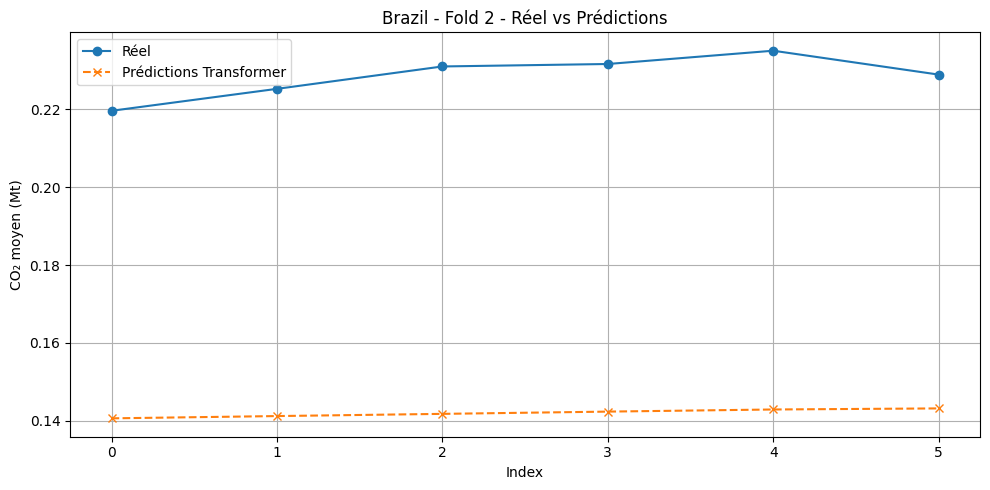


🔹 Fold 3
Train size: 23, Validation size: 6
✅ Modèle Transformer entraîné en 6.40 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step



🔹 Fold 4
Train size: 29, Validation size: 6
✅ Modèle Transformer entraîné en 7.35 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


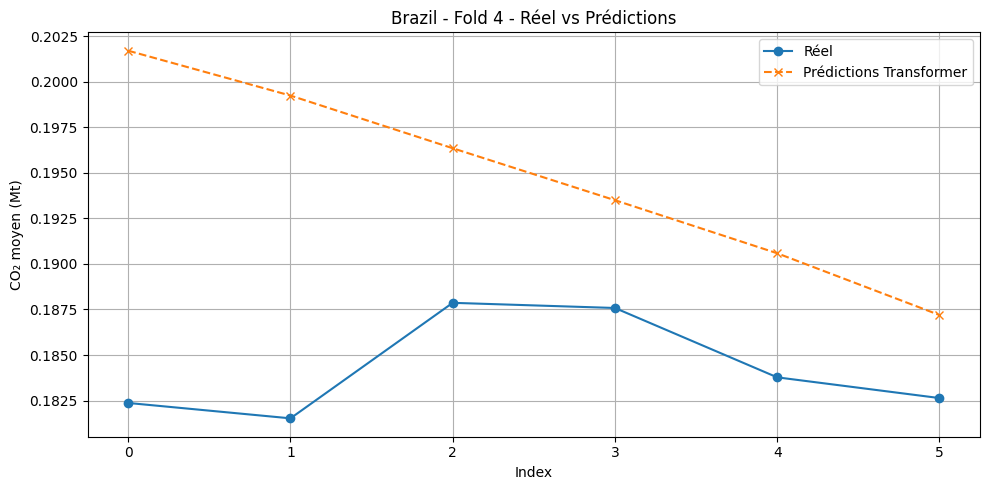


🔹 Fold 5
Train size: 35, Validation size: 6
✅ Modèle Transformer entraîné en 6.64 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


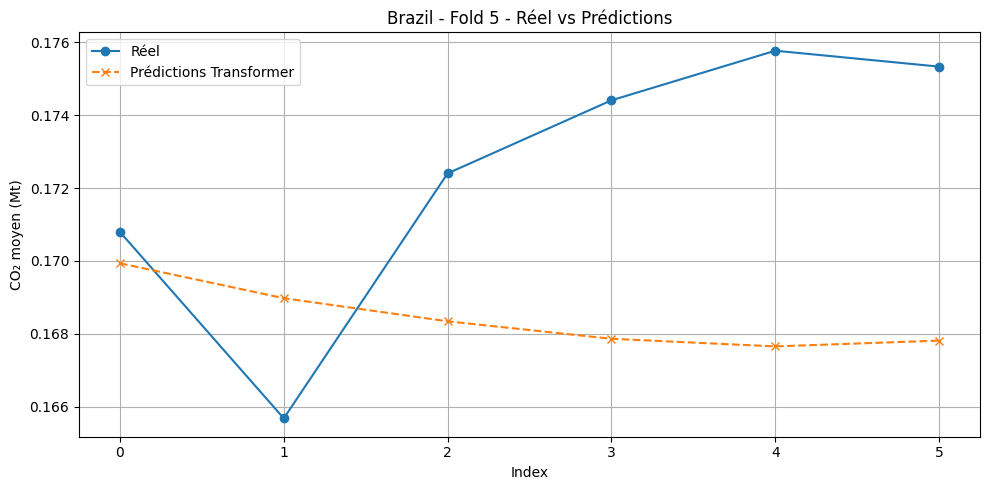


📈 Résultats pour Brazil :
   Fold       MSE      RMSE       MAE          R2  Train Time (s)  \
0     1  0.005378  0.073335  0.073009 -110.032912        9.342299   
1     2  0.007525  0.086748  0.086642 -302.366667       11.585048   
2     3  0.010125  0.100623  0.100039  -96.069131        6.404788   
3     4  0.000143  0.011979  0.010464  -21.709460        7.346584   
4     5  0.000032  0.005672  0.005062   -1.695292        6.639392   

   Pred Time (s)  Nb Parameters  
0       0.374679            118  
1       0.400135            118  
2       0.366849            118  
3       1.375059            118  
4       0.255661            118  

=== Traitement pour le pays : Germany ===

Validation croisée avec TimeSeriesSplit pour Germany (n_splits=5):

🔹 Fold 1
Train size: 11, Validation size: 6


<ipython-input-41-28c10009c991>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()


✅ Modèle Transformer entraîné en 5.52 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


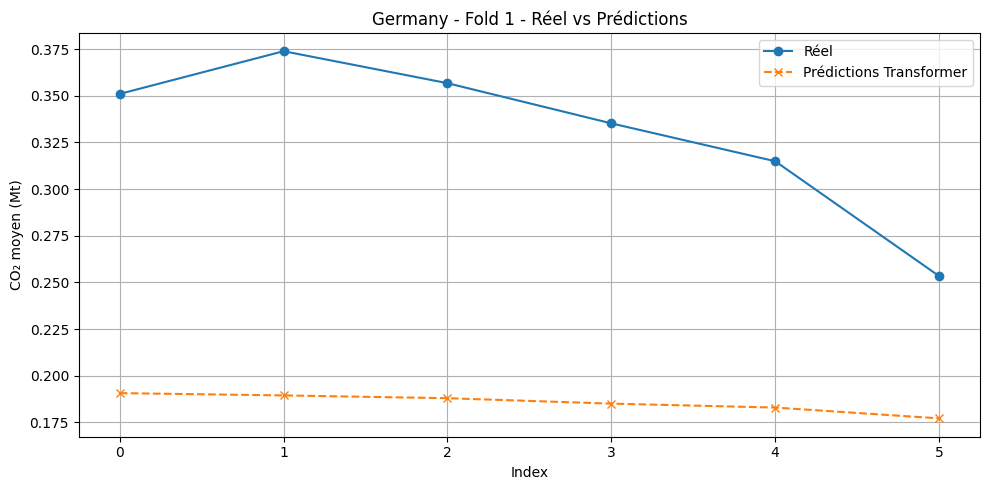


🔹 Fold 2
Train size: 17, Validation size: 6
✅ Modèle Transformer entraîné en 6.36 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


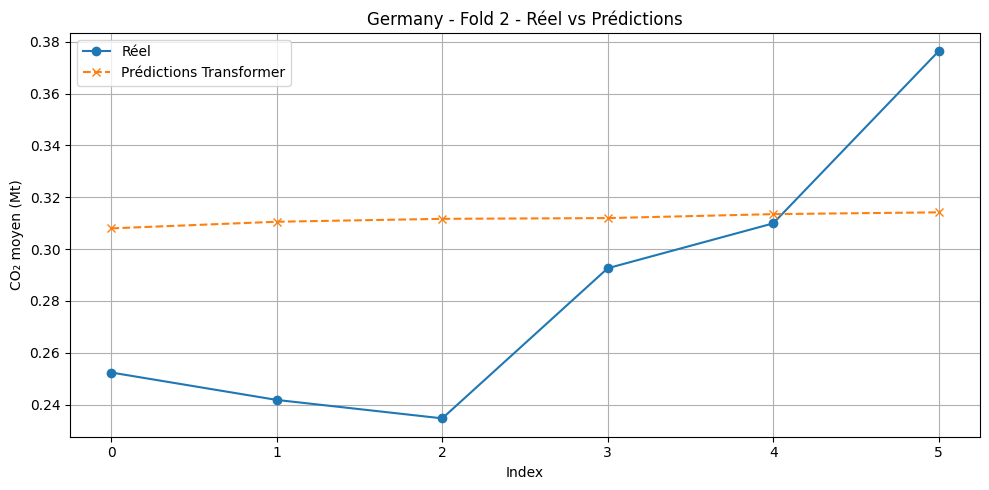


🔹 Fold 3
Train size: 23, Validation size: 6
✅ Modèle Transformer entraîné en 5.48 secondes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout
from tensorflow.keras.layers import MultiHeadAttention, GlobalAveragePooling1D, Add
import os

#  Charger les données
df = pd.read_csv("dataset_preprocessed.csv", parse_dates=['date'])

#  Liste des pays
pays_list = df['country'].unique()

#  Créer un dossier pour sauvegarder les résultats et graphiques
os.makedirs("resultats", exist_ok=True)
os.makedirs("plots", exist_ok=True)

#  Créer les séquences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

#  Transformer Encoder simple
def build_transformer(seq_len, feature_dim, num_heads=2, ff_dim=32, dropout_rate=0.1):
    inputs = Input(shape=(seq_len, feature_dim))
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(num_heads=num_heads, key_dim=feature_dim)(x, x)
    x = Dropout(dropout_rate)(x)
    res = Add()([x, inputs])

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation='relu')(x)
    x = Dense(feature_dim)(x)
    x = Add()([x, res])

    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    return model

#  Boucle sur chaque pays
for pays in pays_list:
    print(f"\n=== Traitement pour le pays : {pays} ===")

    # Filtrer les données pour ce pays
    df_pays = df[df['country'] == pays].copy()
    df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()

    #  Normaliser les données
    scaler = MinMaxScaler()
    df_pays_monthly['value_scaled'] = scaler.fit_transform(df_pays_monthly[['value']])

    SEQ_LENGTH = 12  # Nombre de mois pour la séquence
    X, y = create_sequences(df_pays_monthly['value_scaled'].values, SEQ_LENGTH)

    #  Validation croisée
    n_splits = 5
    tscv = TimeSeriesSplit(n_splits=n_splits)
    results = []

    print(f"\nValidation croisée avec TimeSeriesSplit pour {pays} (n_splits={n_splits}):")
    for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        X_train = np.expand_dims(X_train, axis=-1)  # Ajouter la dimension 'features'
        X_val = np.expand_dims(X_val, axis=-1)

        print(f"\n🔹 Fold {fold + 1}")
        print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}")

        try:
            start_train = time.time()

            model = build_transformer(seq_len=SEQ_LENGTH, feature_dim=1)
            model.compile(optimizer='adam', loss='mse')

            history = model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)
            end_train = time.time()
            train_time = end_train - start_train

            print(f" Modèle Transformer entraîné en {train_time:.2f} secondes")

            start_pred = time.time()
            val_pred = model.predict(X_val).flatten()
            end_pred = time.time()
            pred_time = end_pred - start_pred

            #  Inverser la normalisation
            y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
            val_pred_inv = scaler.inverse_transform(val_pred.reshape(-1, 1)).flatten()

            #  Calculer les métriques
            mse = mean_squared_error(y_val_inv, val_pred_inv)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_inv, val_pred_inv)
            r2 = r2_score(y_val_inv, val_pred_inv)

            results.append({
                'Fold': fold + 1,
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2,
                'Train Time (s)': train_time,
                'Pred Time (s)': pred_time,
                'Nb Parameters': model.count_params()
            })

            #  Visualisation
            plt.figure(figsize=(10, 5))
            plt.plot(range(len(y_val_inv)), y_val_inv, label="Réel", marker='o')
            plt.plot(range(len(val_pred_inv)), val_pred_inv, label="Prédictions Transformer", linestyle='--', marker='x')
            plt.title(f"{pays} - Fold {fold + 1} - Réel vs Prédictions")
            plt.xlabel("Index")
            plt.ylabel("CO₂ moyen (Mt)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            # Sauvegarder le graphe
            os.makedirs(f"plots/{pays}", exist_ok=True)
            plt.savefig(f"plots/{pays}/fold_{fold + 1}.png")
            plt.close()


        except Exception as e:
            print(f" Erreur sur le Fold {fold + 1} pour {pays} : {e}")

    # Enregistrer les résultats pour ce pays
    df_results = pd.DataFrame(results)
    print(f"\n Résultats pour {pays} :")
    print(df_results)

    # Sauvegarder les résultats en CSV
    df_results.to_csv(f"resultats/{pays}_results.csv", index=False)

print("\n Traitement terminé pour tous les pays !")



=== Traitement pour le pays : Brazil ===


<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in


=== Traitement pour le pays : Germany ===


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')



=== Traitement pour le pays : France ===


<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be remo


=== Traitement pour le pays : EU27 & UK ===


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will 


=== Traitement pour le pays : China ===


<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'



=== Traitement pour le pays : WORLD ===


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'



=== Traitement pour le pays : US ===


<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'



=== Traitement pour le pays : UK ===


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarn


=== Traitement pour le pays : Spain ===


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()



=== Traitement pour le pays : Russia ===


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'



=== Traitement pour le pays : ROW ===


<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()



=== Traitement pour le pays : Japan ===


<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'



=== Traitement pour le pays : Italy ===


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')
<ipython-input-44-ae9a0de56de9>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978


=== Traitement pour le pays : India ===


<ipython-input-44-ae9a0de56de9>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')


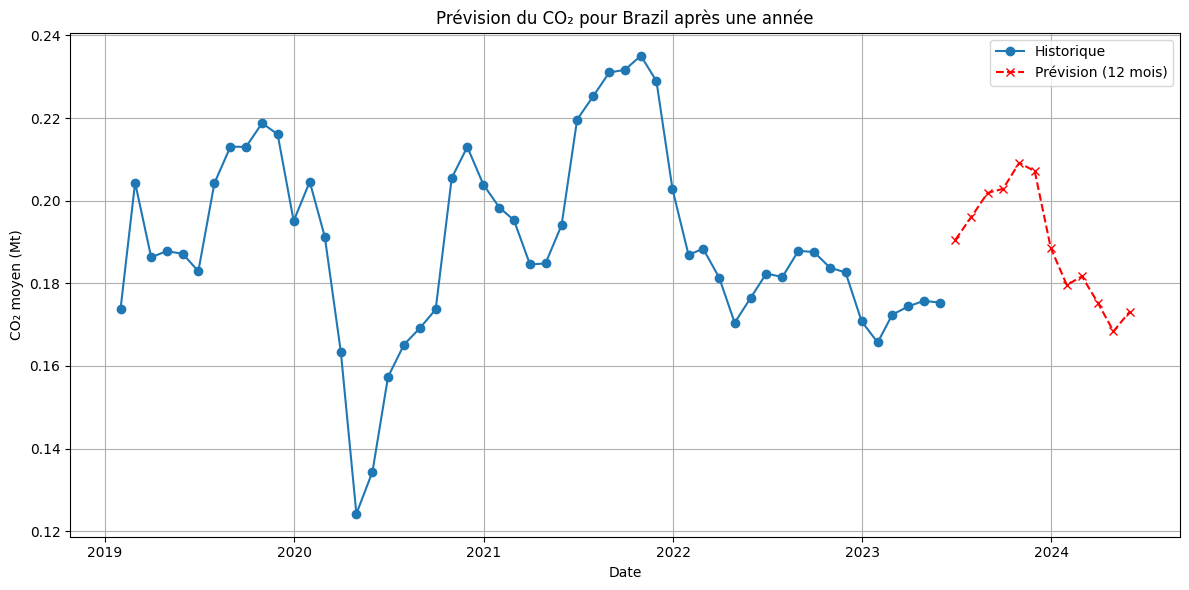

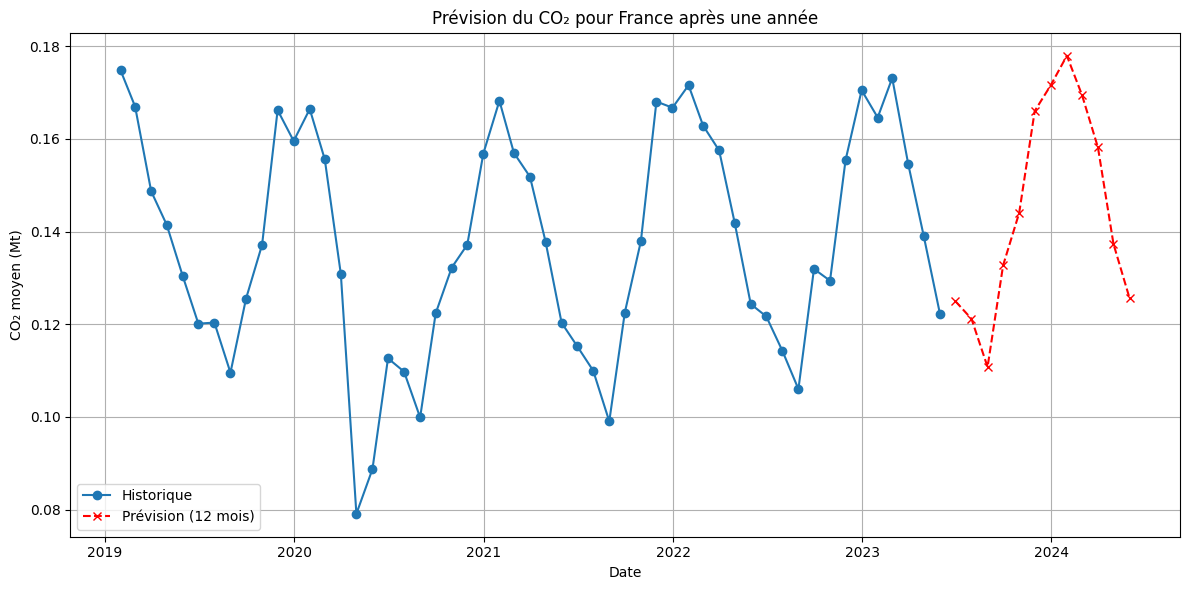

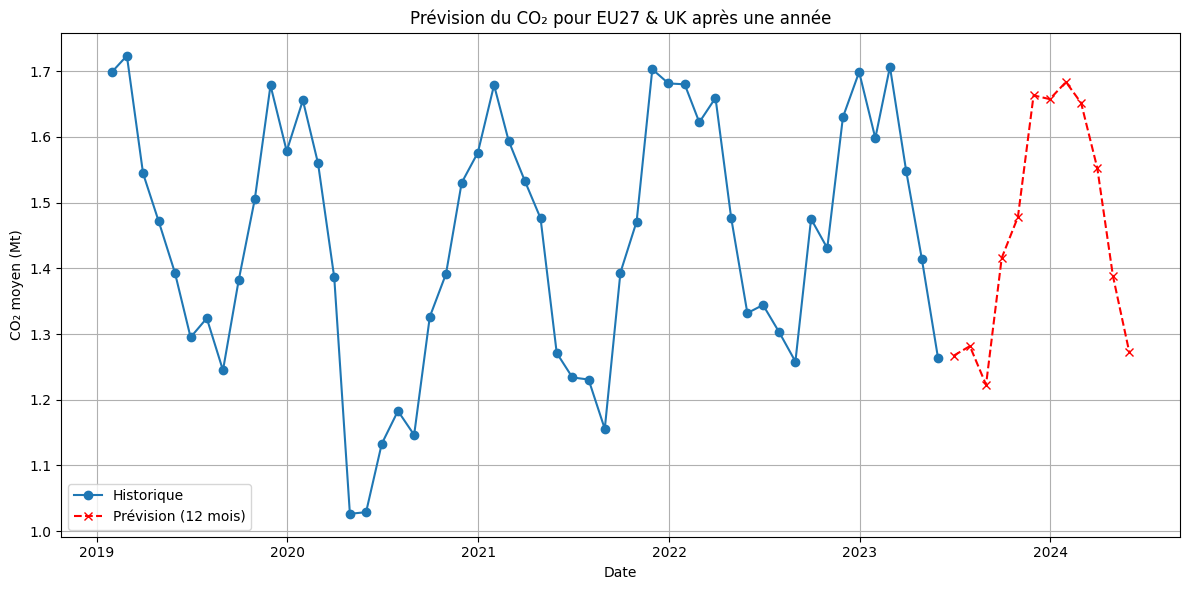

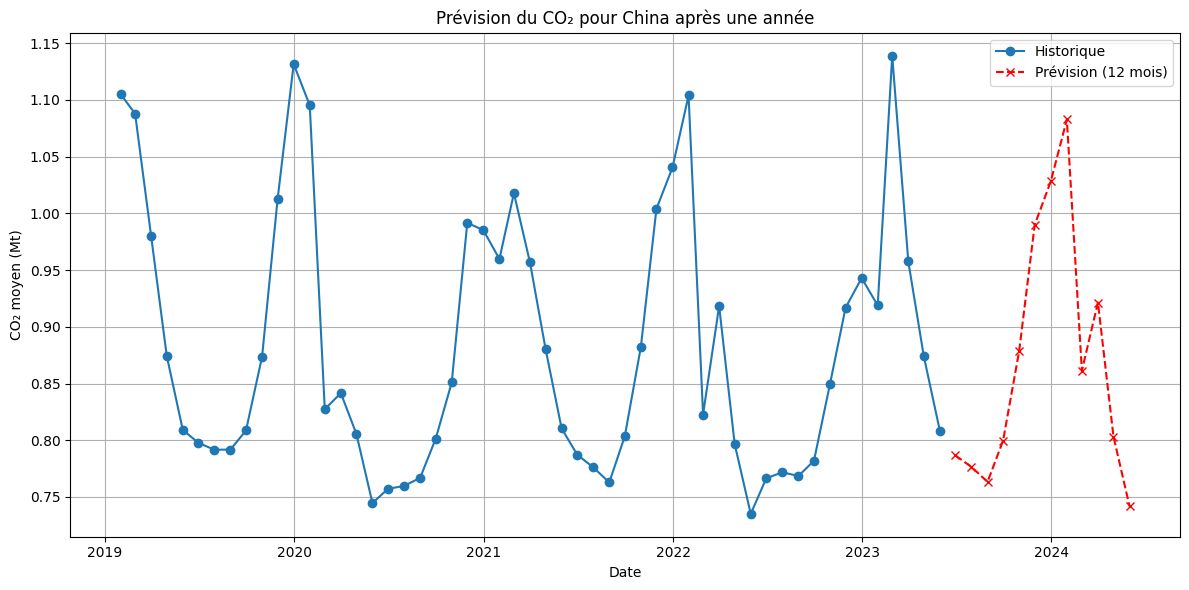

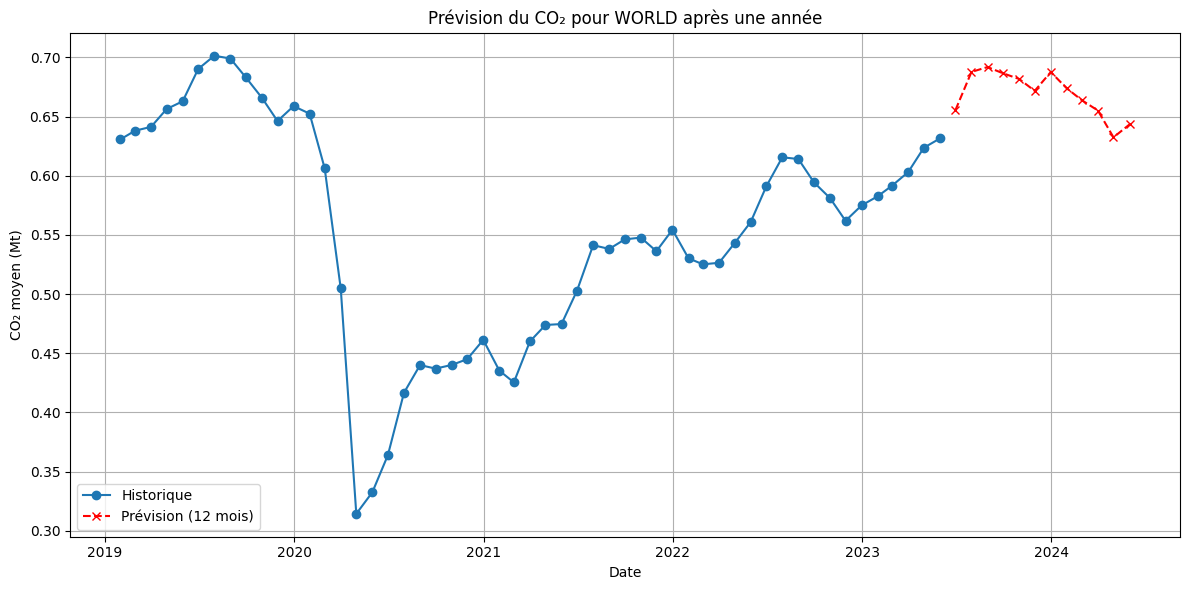

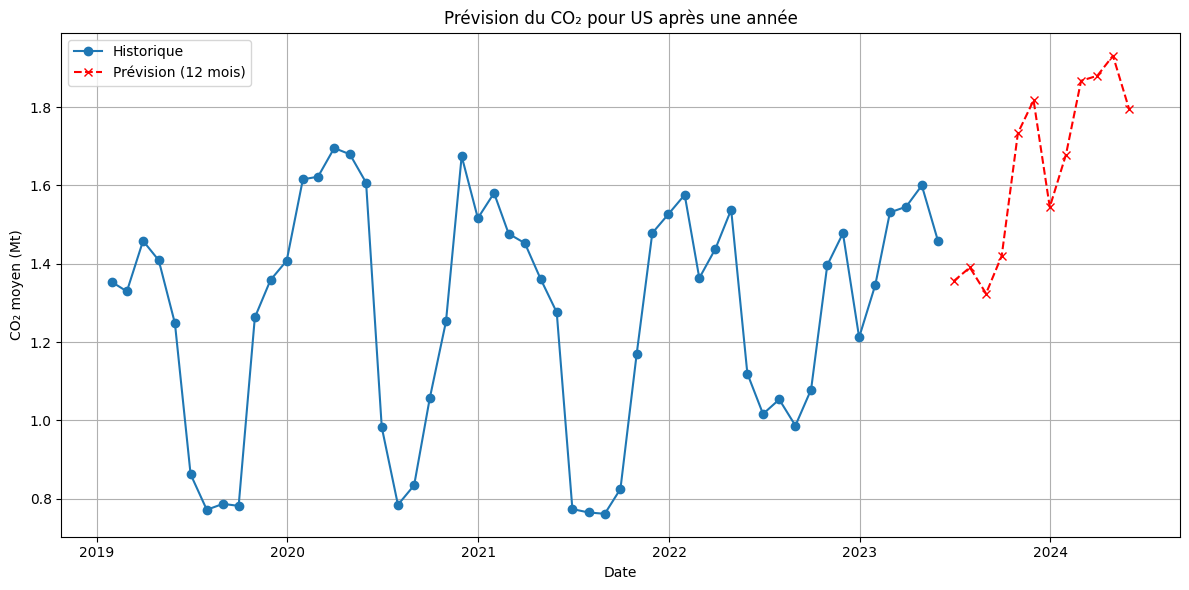

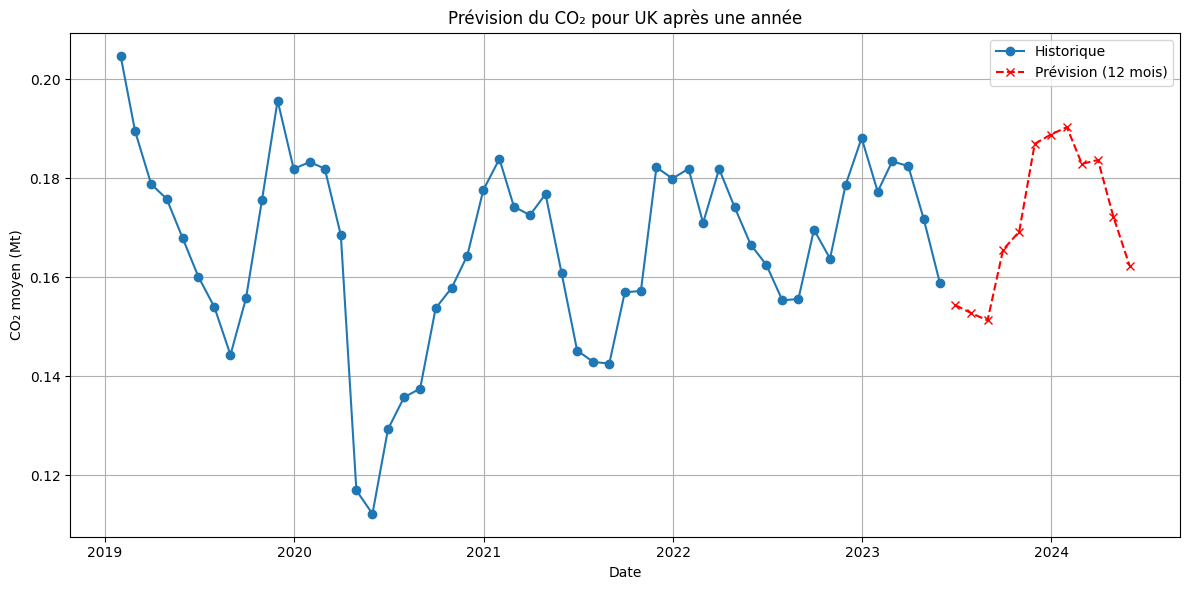

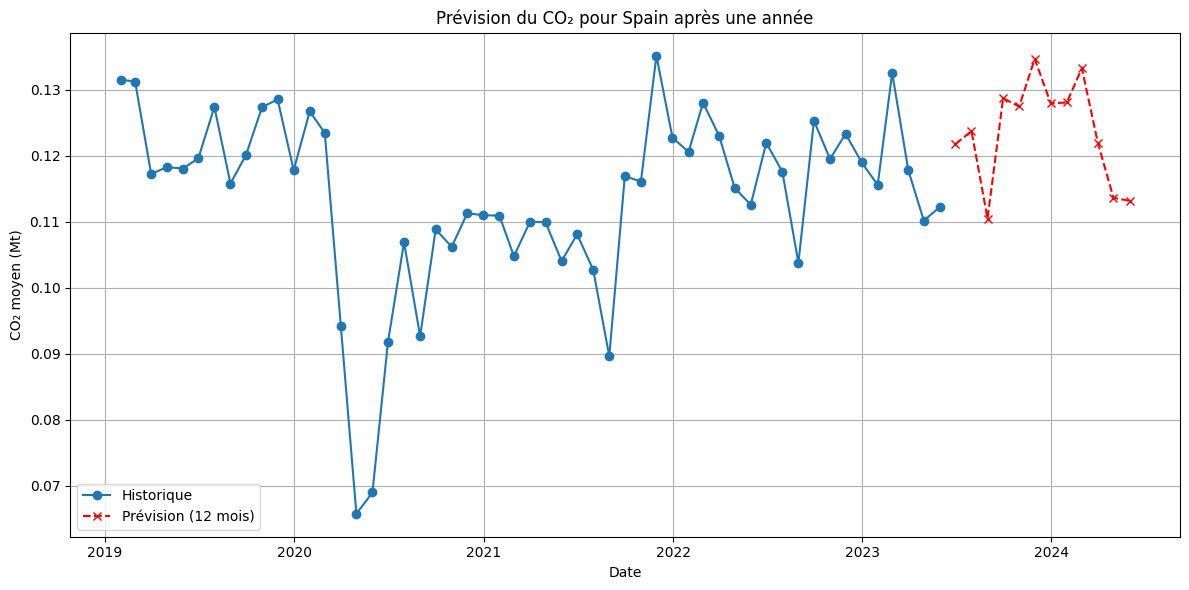

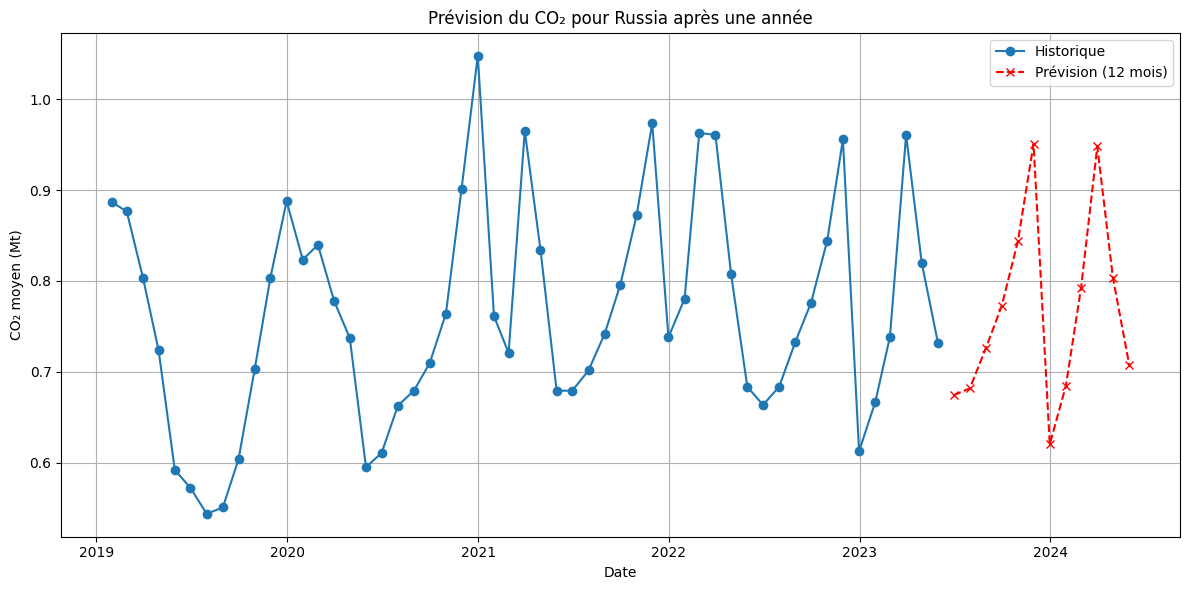

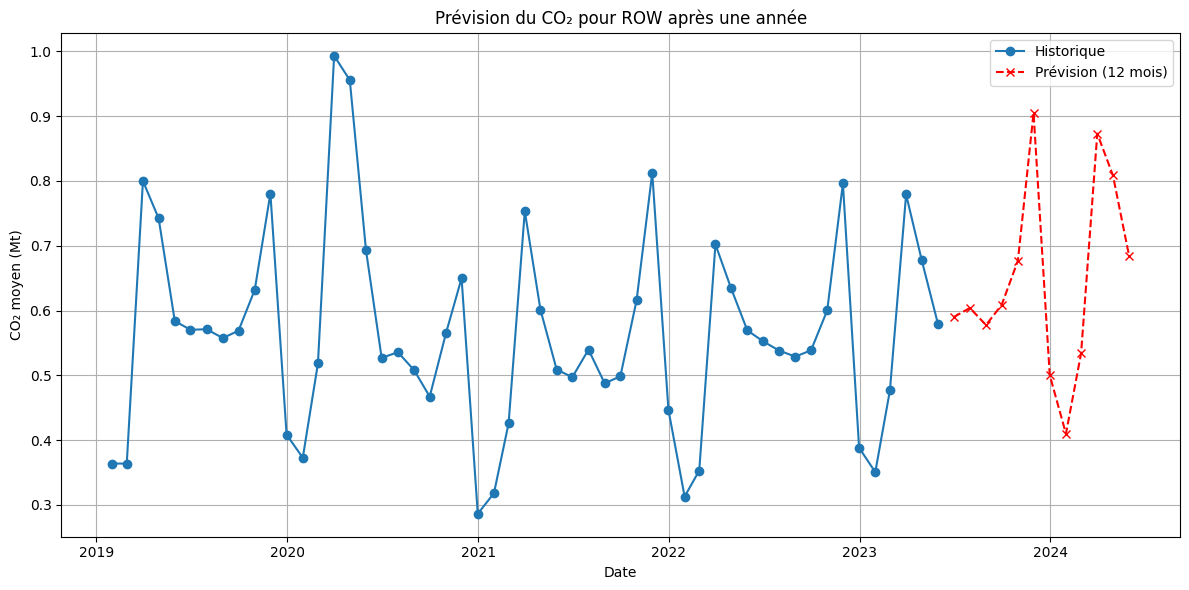

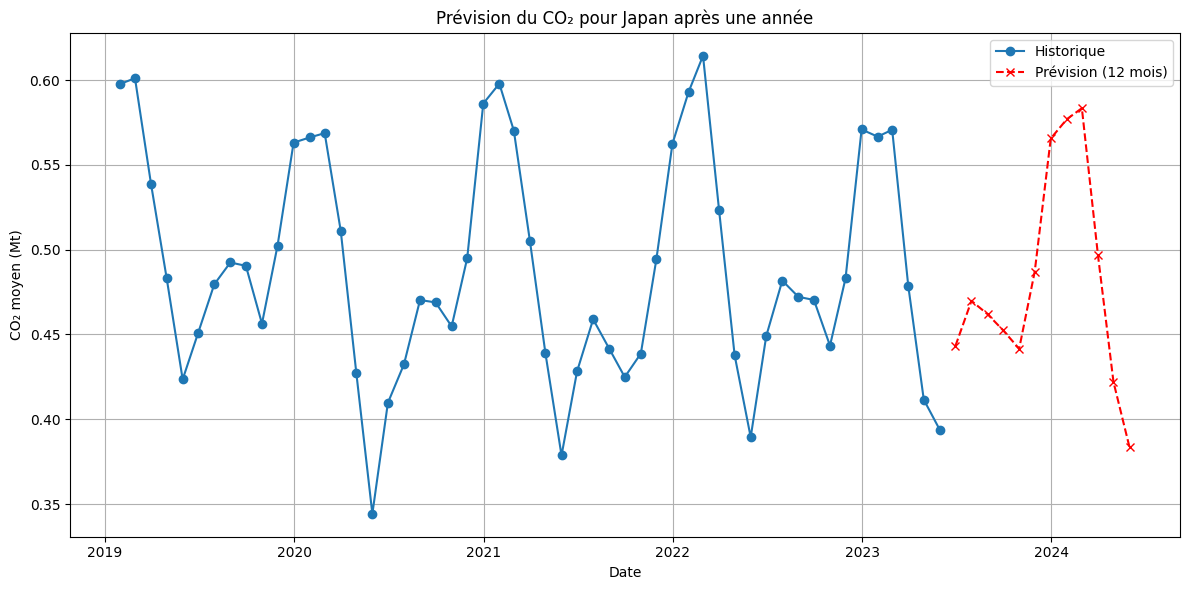

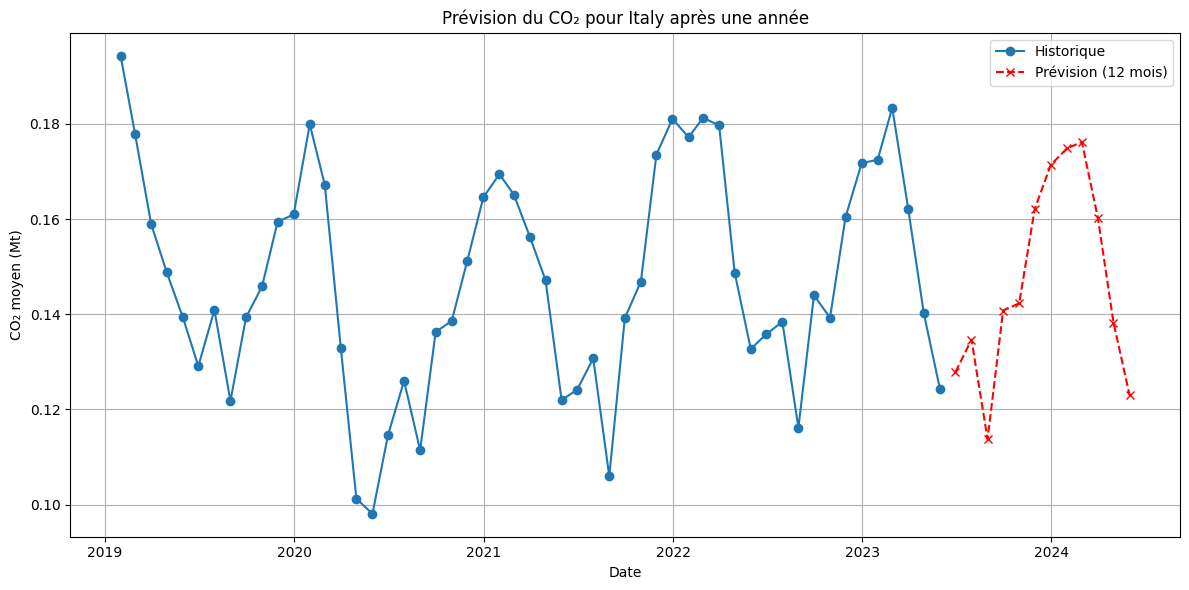

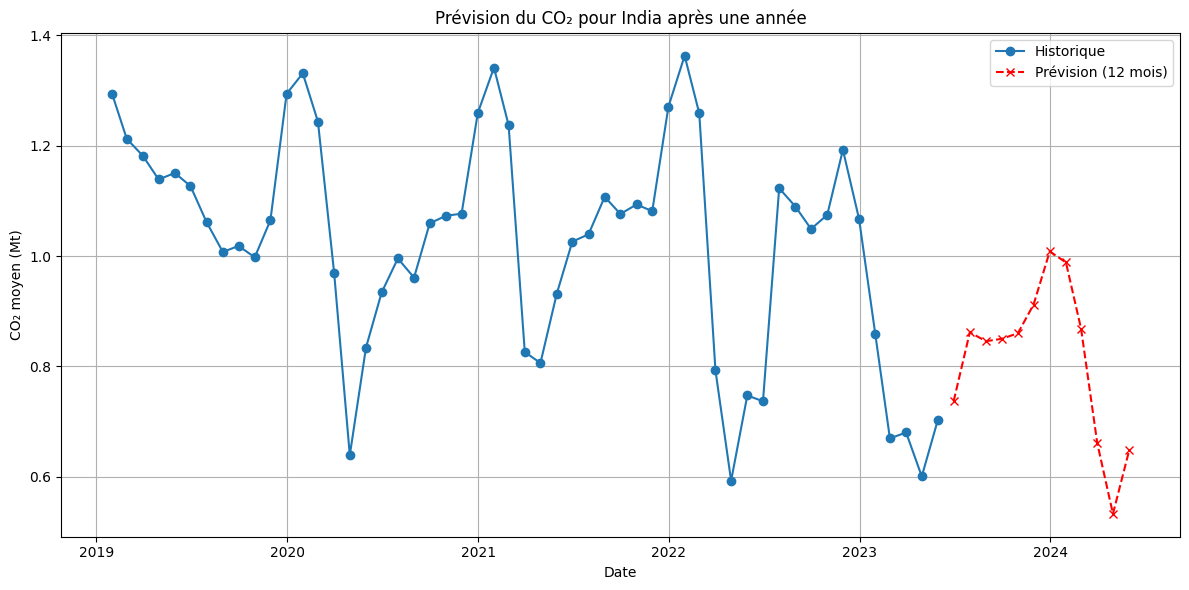

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

#  Charger les données
df = pd.read_csv("dataset_preprocessed.csv", parse_dates=['date'])

#  Liste des pays
pays_list = df['country'].unique()

#  Créer un dossier pour sauvegarder les résultats et graphiques
os.makedirs("resultats_sarima", exist_ok=True)
os.makedirs("plots_sarima", exist_ok=True)

# Boucle sur chaque pays
for pays in pays_list:
    print(f"\n=== Traitement pour le pays : {pays} ===")

    # Filtrer les données pour ce pays
    df_pays = df[df['country'] == pays].copy()
    df_pays_monthly = df_pays.resample('M', on='date')['value'].mean().reset_index()

    #  Préparer la série complète
    y = df_pays_monthly['value']

    #  Entraîner sur tout l'historique
    p, d, q = 1, 1, 1
    P, D, Q, S = 1, 1, 1, 12

    model = sm.tsa.SARIMAX(y, order=(p, d, q), seasonal_order=(P, D, Q, S))
    model_fit = model.fit()

    #  Faire une prédiction pour 12 mois futurs
    n_steps = 12
    forecast = model_fit.forecast(steps=n_steps)

    #  Créer un index de dates futures
    last_date = df_pays_monthly['date'].iloc[-1]
    future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=n_steps, freq='M')

    #  Visualiser
    plt.figure(figsize=(12, 6))
    plt.plot(df_pays_monthly['date'], df_pays_monthly['value'], label='Historique', marker='o')
    plt.plot(future_dates, forecast, label='Prévision (12 mois)', linestyle='--', marker='x', color='red')
    plt.title(f'Prévision du CO₂ pour {pays} après une année')
    plt.xlabel('Date')
    plt.ylabel('CO₂ moyen (Mt)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()
